In [16]:
pip install POT

In [ ]:
pip install mtcnn

In [ ]:
pip install pydiffmap

In [48]:
from PIL import Image
import os, numpy
from sklearn import metrics, svm, neighbors
from sklearn.metrics import classification_report
import pandas as pd
from tqdm import tqdm
import time
import ot
import ot.plot
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from os import listdir
from scipy.interpolate import LinearNDInterpolator
from sklearn.manifold import LocallyLinearEmbedding
import numpy.linalg as la
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from sklearn.metrics.cluster import adjusted_rand_score as ARI
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


(243, 320, 3)


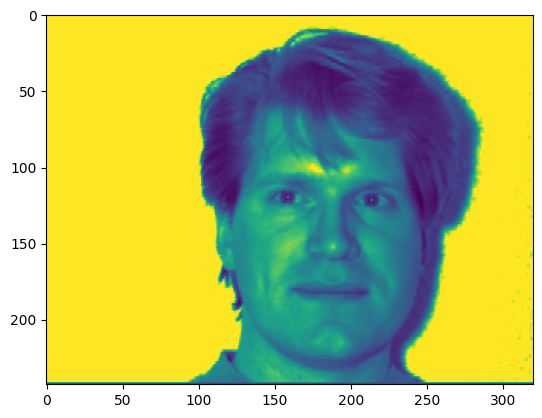

In [7]:
filename = "/content/drive/MyDrive/Yale Face Dataset/subject01.centerlight"
pixels = plt.imread(filename)

# Show RGB shape
rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)

# Show example image
plt.imshow(pixels)
plt.show()

In [8]:
# Create the detector, using default weights
detector = MTCNN()

# Detect faces in the image
results = detector.detect_faces(rgb_pixels)
results


1/1 [==============================] - 0s 160ms/step


[{'box': [121, 69, 122, 154],
  'confidence': 0.9999041557312012,
  'keypoints': {'left_eye': (160, 122),
   'right_eye': (214, 123),
   'nose': (189, 152),
   'mouth_left': (163, 182),
   'mouth_right': (210, 184)}}]

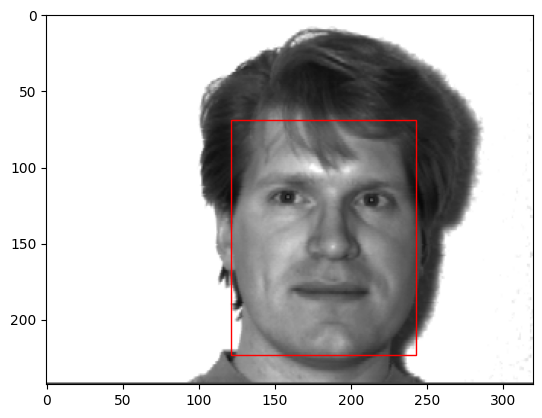

In [9]:
# Draw an image with detected objects
def draw_image_with_boxes(data, result_list):

    # Plot the image
    plt.imshow(data)

    # Get the context for drawing boxes
    ax = plt.gca()

    # Plot each box
    for result in result_list:

        # Get coordinates
        x, y, width, height = result['box']

        # Create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')

        # Draw the box
        ax.add_patch(rect)

    # Show the plot
    plt.show()

# Display faces on the original image
draw_image_with_boxes(rgb_pixels, results)

1/1 [==============================] - 0s 165ms/step


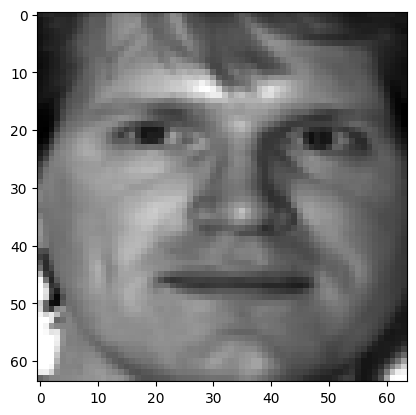

In [24]:
# Extract a single face from a given photograph
def extract_face_from_file(filename, required_size=(64,64)):

    # Load image from file
    image = Image.open(filename)

    return extract_face(image, required_size)

def extract_face(image, required_size=(64, 64)):
    # Convert to RGB
    image = image.convert("RGB")

    # Convert to array
    pixels = np.asarray(image)

    # Detect faces in the image
    results = detector.detect_faces(pixels)

    # Extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']

    # Bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    # Extract the face
    face = pixels[y1:y2, x1:x2]

    # Resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    face_array = np.array(face_array)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_RGB2GRAY)

    # Resize image to model size
    face_array[:,:,0] = gray_face
    face_array[:,:,1] = gray_face
    face_array[:,:,2] = gray_face


    return gray_face


# Create the detector, using default weights
detector = MTCNN()

# Load the photo and extract the face
face_pixels = extract_face_from_file("/content/drive/MyDrive/Yale Face Dataset/subject01.centerlight")

# Show extracted face
plt.imshow(face_pixels, cmap='gray')
plt.show()

  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▋         | 1/16 [00:01<00:15,  1.02s/it]

1/1 [==============================] - 0s 40ms/step


 12%|█▎        | 2/16 [00:01<00:13,  1.02it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 3/16 [00:03<00:13,  1.00s/it]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 4/16 [00:04<00:12,  1.01s/it]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 5/16 [00:04<00:10,  1.01it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 6/16 [00:05<00:09,  1.02it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 7/16 [00:06<00:08,  1.04it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 8/16 [00:07<00:07,  1.07it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 9/16 [00:08<00:06,  1.08it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▎   | 10/16 [00:09<00:05,  1.12it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 11/16 [00:10<00:04,  1.16it/s]

1/1 [==============================] - 0s 36ms/step


 75%|███████▌  | 12/16 [00:11<00:03,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 13/16 [00:11<00:02,  1.19it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 14/16 [00:12<00:01,  1.20it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 15/16 [00:13<00:00,  1.19it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████| 16/16 [00:14<00:00,  1.11it/s]


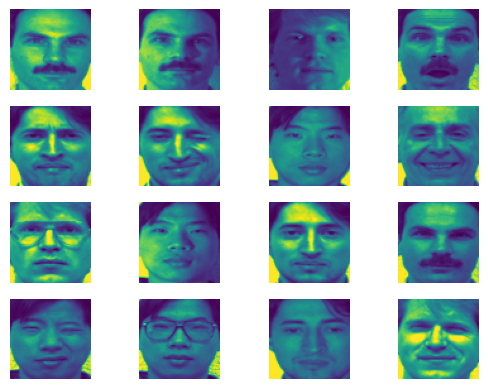

In [51]:
 # Returns list of filenames
DIRECTORY = "/content/drive/MyDrive/Yale Face Dataset/"
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)
i = 1
faces = list()
for filename in tqdm(list_files(DIRECTORY, "subject")[0:16]):

    # Path
    path = DIRECTORY + filename

    # Get face
    face = extract_face_from_file(path)

    # Set up subplot
    plt.subplot(4, 4, i)
    plt.axis('off')
    plt.imshow(face)

    # Add face to faces list
    faces.append(face)
    i += 1
plt.show()

In [52]:
# List filenames
filenames = pd.DataFrame(list_files(DIRECTORY, "subject"))

# Generate split
df = filenames[0].str.split(".", expand=True)
df["filename"] = filenames

# Tidy columns
df = df.rename(columns = {0:"subject", 1:"category"})
df['subject'] = df.subject.str.replace('subject' , '')
df.apply(pd.to_numeric, errors='coerce').dropna()
df['subject'] = pd.to_numeric(df["subject"])
df

subject     category               filename
0          2  centerlight  subject02.centerlight
1          2    leftlight    subject02.leftlight
2          1   rightlight   subject01.rightlight
3          2    surprised    subject02.surprised
4          3          sad          subject03.sad
..       ...          ...                    ...
160        6   rightlight   subject06.rightlight
161        5       normal       subject05.normal
162       11       normal       subject11.normal
163       15    surprised    subject15.surprised
164       15         wink         subject15.wink

[165 rows x 3 columns]

In [53]:
detector = MTCNN()

# Function to load faces into dataset
def load_dataset(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY + filename

        # Get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

In [54]:
target_labels = df['subject']

In [55]:
X = df.drop('subject',axis=1)

In [56]:
data = load_dataset(X)

  0%|          | 0/165 [00:00<?, ?it/s]

1/1 [==============================] - 0s 154ms/step


  1%|          | 1/165 [00:01<03:12,  1.17s/it]

1/1 [==============================] - 0s 28ms/step


  1%|          | 2/165 [00:01<02:35,  1.05it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 3/165 [00:02<02:23,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 4/165 [00:03<02:17,  1.17it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 5/165 [00:04<02:13,  1.20it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▎         | 6/165 [00:05<02:11,  1.21it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 7/165 [00:05<02:08,  1.23it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 8/165 [00:06<02:04,  1.26it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 9/165 [00:07<02:03,  1.26it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 10/165 [00:08<02:03,  1.26it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 11/165 [00:09<02:00,  1.28it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 12/165 [00:09<02:00,  1.27it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 13/165 [00:10<02:01,  1.25it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 14/165 [00:11<02:02,  1.24it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 15/165 [00:12<02:03,  1.21it/s]

1/1 [==============================] - 0s 30ms/step


 10%|▉         | 16/165 [00:13<02:02,  1.22it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 17/165 [00:14<02:00,  1.23it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 18/165 [00:14<01:57,  1.25it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 19/165 [00:15<01:57,  1.25it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 20/165 [00:16<01:54,  1.26it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 21/165 [00:17<01:54,  1.25it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 22/165 [00:17<01:55,  1.24it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 23/165 [00:18<01:56,  1.22it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 24/165 [00:19<01:54,  1.23it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 25/165 [00:20<01:52,  1.24it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▌        | 26/165 [00:21<01:52,  1.24it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 27/165 [00:22<01:51,  1.23it/s]

1/1 [==============================] - 0s 34ms/step


 17%|█▋        | 28/165 [00:22<01:51,  1.23it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 29/165 [00:23<01:51,  1.22it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 30/165 [00:24<01:53,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


 19%|█▉        | 31/165 [00:25<01:52,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 32/165 [00:26<01:49,  1.21it/s]

1/1 [==============================] - 0s 28ms/step


 20%|██        | 33/165 [00:27<01:48,  1.22it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██        | 34/165 [00:27<01:46,  1.23it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 35/165 [00:28<01:43,  1.25it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 36/165 [00:29<01:42,  1.25it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 37/165 [00:30<01:43,  1.24it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 38/165 [00:31<01:42,  1.24it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▎       | 39/165 [00:31<01:41,  1.24it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 40/165 [00:32<01:41,  1.23it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 41/165 [00:33<01:43,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 42/165 [00:34<01:43,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 43/165 [00:35<01:40,  1.22it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 44/165 [00:36<01:43,  1.17it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 45/165 [00:36<01:41,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 46/165 [00:37<01:39,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 47/165 [00:38<01:43,  1.14it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 48/165 [00:39<01:46,  1.10it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 49/165 [00:40<01:43,  1.12it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 50/165 [00:41<01:41,  1.13it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 51/165 [00:42<01:43,  1.10it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 52/165 [00:43<01:40,  1.13it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 53/165 [00:44<01:36,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 54/165 [00:44<01:33,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 55/165 [00:45<01:31,  1.20it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 56/165 [00:46<01:30,  1.21it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 57/165 [00:47<01:30,  1.19it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 58/165 [00:48<01:30,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 59/165 [00:48<01:28,  1.19it/s]

1/1 [==============================] - 0s 40ms/step


 36%|███▋      | 60/165 [00:50<01:54,  1.09s/it]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 61/165 [00:51<01:52,  1.08s/it]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 62/165 [00:52<01:49,  1.06s/it]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 63/165 [00:53<01:47,  1.05s/it]

1/1 [==============================] - 0s 38ms/step


 39%|███▉      | 64/165 [00:54<01:44,  1.04s/it]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 65/165 [00:55<01:40,  1.00s/it]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 66/165 [00:56<01:37,  1.02it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 67/165 [00:57<01:33,  1.04it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 68/165 [00:58<01:31,  1.06it/s]

1/1 [==============================] - 0s 32ms/step


 42%|████▏     | 69/165 [00:59<01:29,  1.07it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 70/165 [01:00<01:26,  1.10it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 71/165 [01:01<01:22,  1.13it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▎     | 72/165 [01:01<01:20,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 73/165 [01:02<01:18,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 74/165 [01:03<01:16,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 75/165 [01:04<01:16,  1.18it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 76/165 [01:05<01:14,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 77/165 [01:05<01:12,  1.21it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 78/165 [01:06<01:12,  1.21it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 79/165 [01:07<01:10,  1.22it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 80/165 [01:08<01:10,  1.21it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 81/165 [01:09<01:10,  1.20it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████▉     | 82/165 [01:10<01:09,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 83/165 [01:10<01:08,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 84/165 [01:11<01:07,  1.21it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 85/165 [01:12<01:05,  1.22it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 86/165 [01:13<01:04,  1.22it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 87/165 [01:14<01:03,  1.23it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 88/165 [01:15<01:02,  1.23it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 89/165 [01:15<01:02,  1.22it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 90/165 [01:16<01:00,  1.23it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 91/165 [01:17<01:00,  1.23it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 92/165 [01:18<00:59,  1.23it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▋    | 93/165 [01:19<00:58,  1.23it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 94/165 [01:19<00:58,  1.22it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 95/165 [01:20<00:58,  1.20it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 96/165 [01:21<00:58,  1.19it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 97/165 [01:22<00:56,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 98/165 [01:23<00:54,  1.22it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 99/165 [01:24<00:53,  1.23it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 100/165 [01:24<00:53,  1.21it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 101/165 [01:25<00:54,  1.18it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 102/165 [01:26<00:54,  1.16it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 103/165 [01:27<00:53,  1.16it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 104/165 [01:28<00:51,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 105/165 [01:29<00:50,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 106/165 [01:30<00:49,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 107/165 [01:30<00:48,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 108/165 [01:31<00:47,  1.20it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 109/165 [01:32<00:46,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 110/165 [01:33<00:45,  1.21it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 111/165 [01:34<00:44,  1.20it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 112/165 [01:35<00:44,  1.19it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 113/165 [01:35<00:44,  1.17it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 114/165 [01:36<00:44,  1.15it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 115/165 [01:37<00:44,  1.14it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 116/165 [01:38<00:43,  1.12it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 117/165 [01:39<00:42,  1.12it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 118/165 [01:40<00:41,  1.13it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 119/165 [01:41<00:40,  1.15it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 120/165 [01:42<00:38,  1.16it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 121/165 [01:42<00:37,  1.16it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 122/165 [01:43<00:36,  1.17it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 123/165 [01:44<00:36,  1.16it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 124/165 [01:45<00:34,  1.18it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 125/165 [01:46<00:33,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 126/165 [01:47<00:32,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 127/165 [01:48<00:32,  1.19it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 128/165 [01:48<00:30,  1.20it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 129/165 [01:49<00:30,  1.16it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 130/165 [01:50<00:30,  1.16it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 131/165 [01:51<00:29,  1.15it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 132/165 [01:52<00:28,  1.16it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 133/165 [01:53<00:27,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 134/165 [01:54<00:26,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 135/165 [01:54<00:25,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 136/165 [01:55<00:24,  1.19it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 137/165 [01:56<00:23,  1.18it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▎ | 138/165 [01:57<00:22,  1.19it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 139/165 [01:58<00:22,  1.18it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 140/165 [01:59<00:21,  1.18it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 141/165 [01:59<00:20,  1.17it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 142/165 [02:00<00:19,  1.17it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 143/165 [02:01<00:18,  1.18it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 144/165 [02:02<00:17,  1.18it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 145/165 [02:03<00:16,  1.18it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 146/165 [02:04<00:16,  1.14it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 147/165 [02:05<00:15,  1.13it/s]

1/1 [==============================] - 0s 34ms/step


 90%|████████▉ | 148/165 [02:06<00:15,  1.12it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 149/165 [02:06<00:14,  1.12it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 150/165 [02:07<00:13,  1.11it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 151/165 [02:08<00:12,  1.12it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 152/165 [02:09<00:11,  1.12it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 153/165 [02:10<00:10,  1.13it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 154/165 [02:11<00:09,  1.14it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 155/165 [02:12<00:08,  1.12it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 156/165 [02:13<00:08,  1.12it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 157/165 [02:14<00:07,  1.12it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 158/165 [02:14<00:06,  1.14it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 159/165 [02:15<00:05,  1.14it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 160/165 [02:16<00:04,  1.14it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 161/165 [02:17<00:03,  1.13it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 162/165 [02:18<00:02,  1.13it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 163/165 [02:19<00:01,  1.13it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 164/165 [02:20<00:00,  1.12it/s]

1/1 [==============================] - 0s 29ms/step


100%|██████████| 165/165 [02:21<00:00,  1.17it/s]


In [31]:
data[0].shape

(64, 64)

In [ ]:
data = np.reshape(data, (data.shape[0], -1))

NameError: ignored

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/data.npy', data)

In [65]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/data.npy')

In [66]:
data

array([[ 18,  18,  19, ..., 255, 255, 255],
       [ 49,  45,  37, ...,  88,  87,  86],
       [ 11,  11,  10, ..., 181, 180, 181],
       ...,
       [ 65,  60,  53, ...,  37,  25,  18],
       [  4,   4,   4, ...,  16,  18,  18],
       [ 15,  15,  17, ...,  18,  26,  30]], dtype=uint8)

In [14]:
from sklearn.manifold import Isomap
from sklearn.neighbors import NearestNeighbors


n_neighbors = 5  # Number of nearest neighbors
n_components = 2  # Desired dimensionality of the embedding

# Create a neighborhood graph using k-nearest neighbors
nn = NearestNeighbors(n_neighbors=n_neighbors)
nn.fit(data)
neighbors_graph = nn.kneighbors_graph()

# Apply Isomap to find the geodesic distances
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
embedding = isomap.fit_transform(data)

In [41]:
def isomap_embedding(data, n_neighbors, n_components = 2,):
 # Create a neighborhood graph using k-nearest neighbors
  nn = NearestNeighbors(n_neighbors=n_neighbors)
  nn.fit(data)
  neighbors_graph = nn.kneighbors_graph()

  # Apply Isomap to find the geodesic distances
  isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
  embedding = isomap.fit_transform(data)
  return embedding

In [ ]:
embedding = isomap_embedding(data, n_neighbors = 5)

In [ ]:
# Assuming 'distance_matrix' is your pairwise distance matrix
#n_components = 2  # Choose the desired dimensionality for your embedding
#isomap = Isomap(n_components=n_components)
#embedding = isomap.fit_transform(geodesic_distances,target_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 10 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

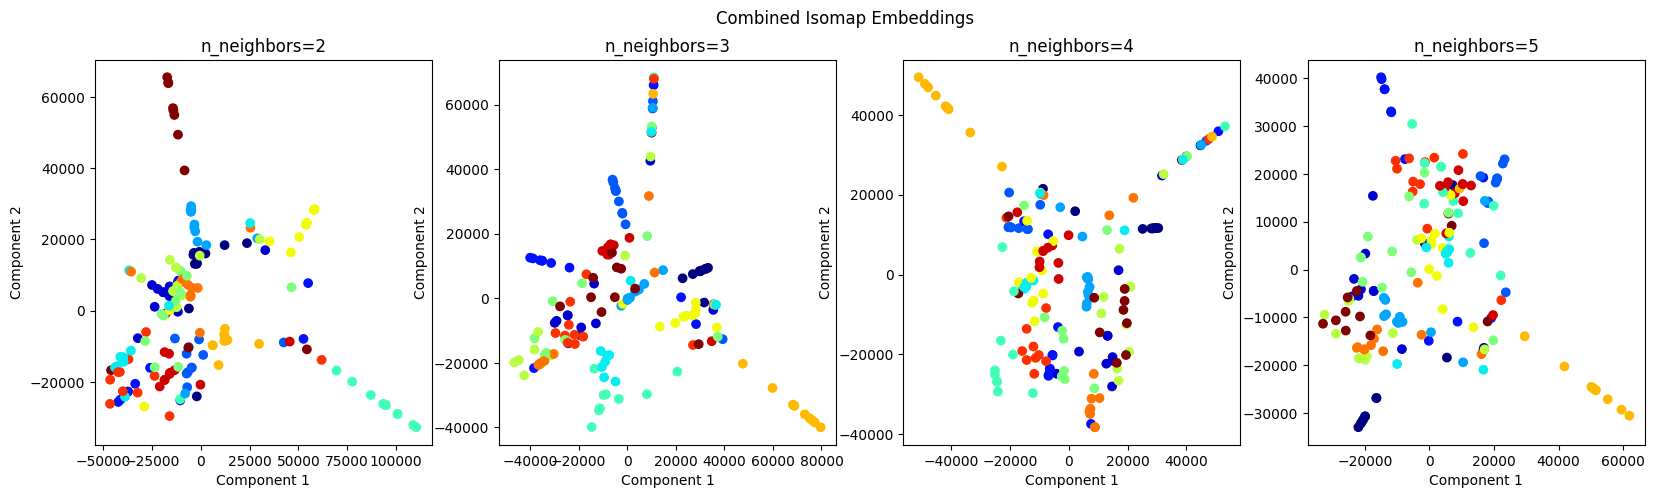

In [ ]:
def plot_combined_isomap_embeddings(data, n_neighbors_list, n_components=2):
    fig, axes = plt.subplots(1, len(n_neighbors_list), figsize=(20, 5))
    fig.suptitle('Combined Isomap Embeddings')

    for i, n_neighbors in enumerate(n_neighbors_list):
        embedding = isomap_embedding(data, n_neighbors, n_components)
        ax = axes[i]
        ax.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, cmap='jet')
        ax.set_title(f'n_neighbors={n_neighbors}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')


n_neighbors_list = [2, 3, 4, 5]

plot_combined_isomap_embeddings(data, n_neighbors_list, n_components=2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


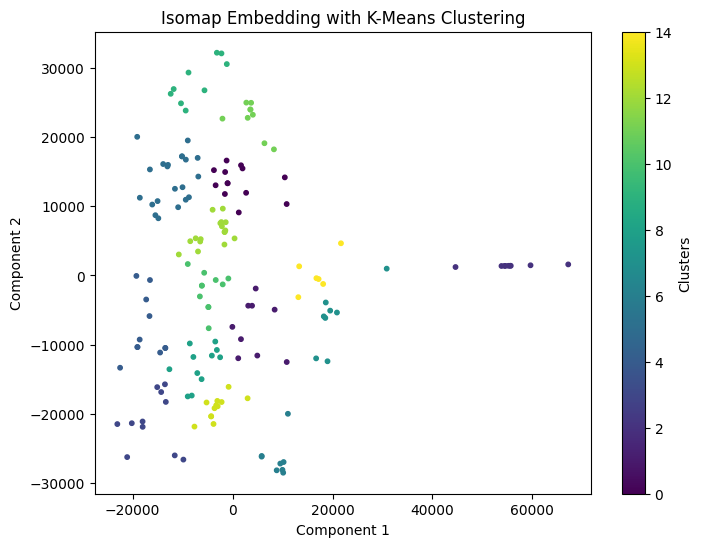

In [ ]:
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means clustering on the embedded data
num_clusters = 15  # Number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embedding)
cluster_labels = kmeans.labels_

# Visualize the clusters in the reduced space
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('Isomap Embedding with K-Means Clustering')
plt.colorbar(label='Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from sklearn.metrics.cluster import adjusted_rand_score as ARI
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_labels, cluster_labels)
cm

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 8, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 8, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 8, 1, 0, 0],
       [2, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 4, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 6, 0, 1, 0],
       [0, 0, 9, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1, 4, 0, 3, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [9, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 7, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]])

In [ ]:
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(-cm)
count = cm[row_ind, col_ind].sum()
count

81

In [ ]:
print('NMI of cluster is ', NMI(target_labels, cluster_labels)*100)
print('ACC of cluster is ', count/165*100)
print('Fscore of cluster is ', f1_score(target_labels, cluster_labels, average = 'weighted')*100)
print('ARI of cluster is ', ARI(target_labels, cluster_labels)*100)


NMI of cluster is  58.11856260845416
ACC of cluster is  49.09090909090909
Fscore of cluster is  4.351413292589763
ARI of cluster is  32.32327746741154


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

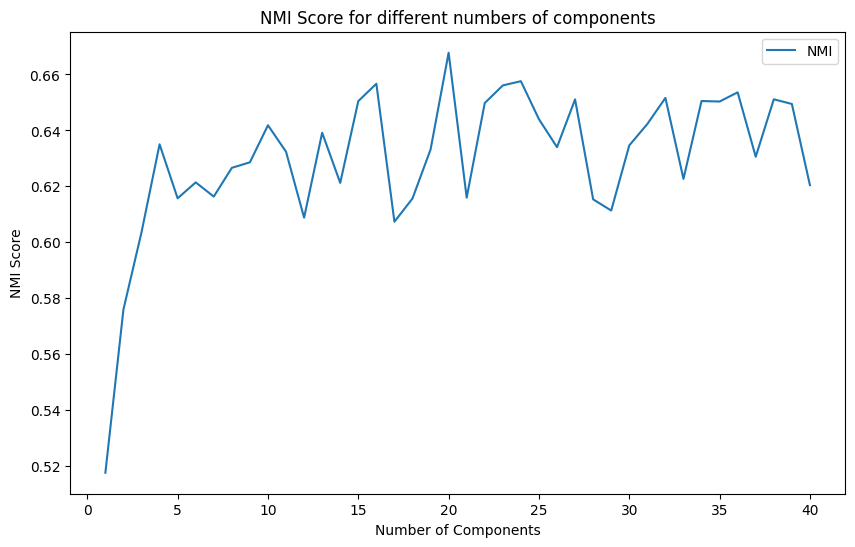

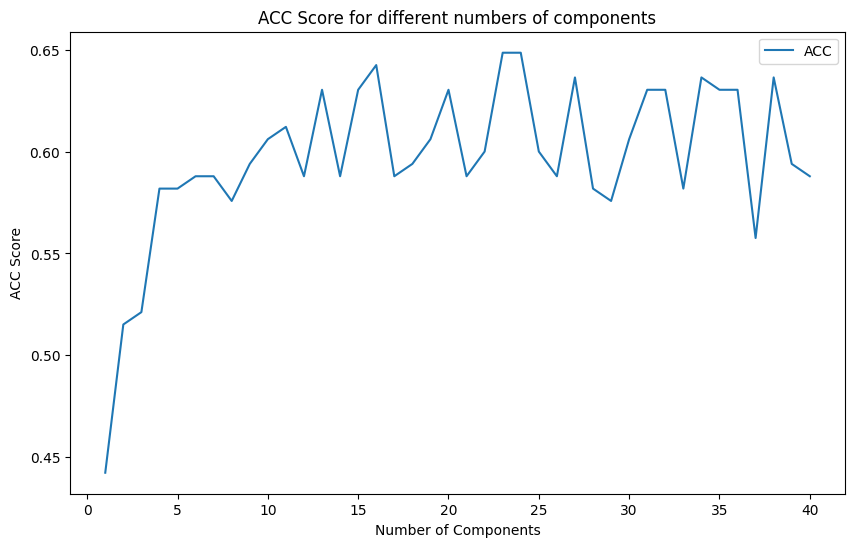

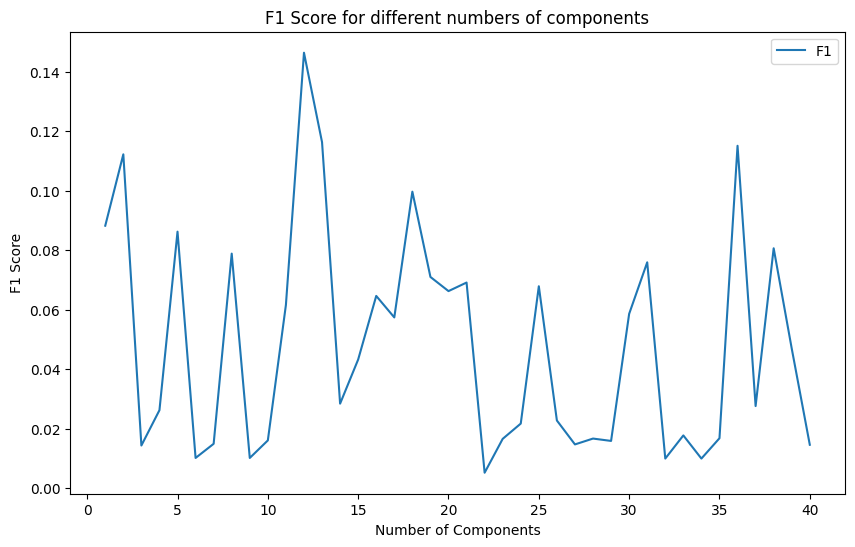

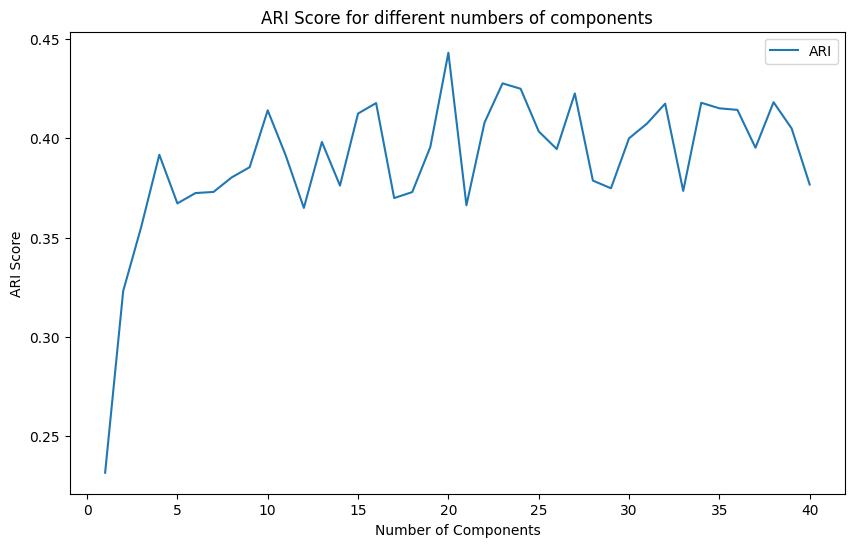

In [67]:
def calculate_scores(data, target_labels, n_neighbors, max_components):
    scores = {
        'NMI': [],
        'ACC': [],
        'F1': [],
        'ARI': []
    }

    for n_components in range(1, max_components + 1):
        # Obtain the embedding for the current number of components
        embedding = isomap_embedding(data, n_neighbors, n_components)

        # Apply KMeans clustering on the embedded data
        kmeans = KMeans(n_clusters=len(np.unique(target_labels)))
        kmeans.fit(embedding)
        cluster_labels = kmeans.labels_

        # Calculate confusion matrix
        cm = confusion_matrix(target_labels, cluster_labels)

        row_ind, col_ind = linear_sum_assignment(-cm)
        count = cm[row_ind, col_ind].sum()

        # Calculate and store scores
        scores['NMI'].append(NMI(target_labels, cluster_labels))
        scores['ACC'].append(count / len(target_labels))
        scores['F1'].append(f1_score(target_labels, cluster_labels, average='weighted'))
        scores['ARI'].append(ARI(target_labels, cluster_labels))

    return scores

# Example usage
n_neighbors = 4  # Number of neighbors for Isomap
max_components = 40  # Maximum number of components to try

performance_scores = calculate_scores(data, target_labels, n_neighbors, max_components)

# Plotting individual graphs for each score
components_range = range(1, max_components + 1)

plt.figure(figsize=(10, 6))
plt.plot(components_range, performance_scores['NMI'], label='NMI')
plt.xlabel('Number of Components')
plt.ylabel('NMI Score')
plt.title('NMI Score for different numbers of components')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(components_range, performance_scores['ACC'], label='ACC')
plt.xlabel('Number of Components')
plt.ylabel('ACC Score')
plt.title('ACC Score for different numbers of components')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(components_range, performance_scores['F1'], label='F1')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.title('F1 Score for different numbers of components')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(components_range, performance_scores['ARI'], label='ARI')
plt.xlabel('Number of Components')
plt.ylabel('ARI Score')
plt.title('ARI Score for different numbers of components')
plt.legend()
plt.show()

In [ ]:

n_neighbors = 6  # Number of nearest neighbors
n_components = 2  # Desired dimensionality of the embedding


nn = NearestNeighbors(n_neighbors=n_neighbors)
nn.fit(data)
neighbors_graph = nn.kneighbors_graph()

# Apply Isomap to find the geodesic distances
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
embedding = isomap.fit_transform(data)

# The geodesic distances can be accessed as follows:
geodesic_distances = isomap.dist_matrix_

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Assuming 'geodesic_distances' is your precomputed geodesic distance matrix
n_components = 2  # Number of dimensions for the low-dimensional representation

mds = MDS(n_components=n_components, dissimilarity='precomputed')
geodesic_embedding = mds.fit_transform(geodesic_distances,target_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Assuming 'geodesic_distances' is your precomputed geodesic distance matrix
n_components = 2  # Number of dimensions for the low-dimensional representation

mds = MDS(n_components=n_components, dissimilarity='euclidean')
euclidean_embedding = mds.fit_transform(data,target_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


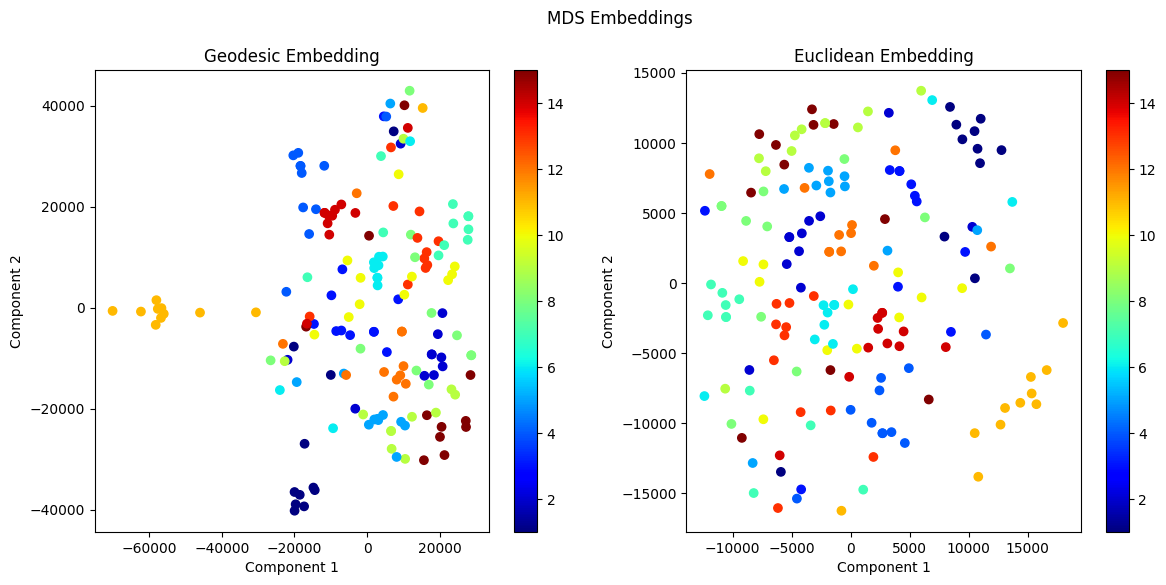

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('MDS Embeddings')

# Plot MDS embedding with geodesic distances
ax1 = axes[0]
scatter1 = ax1.scatter(geodesic_embedding[:, 0], geodesic_embedding[:, 1], c=target_labels, cmap='jet')
ax1.set_title('Geodesic Embedding')
ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
cbar1 = fig.colorbar(scatter1, ax=ax1)

# Plot MDS embedding with Euclidean distances
ax2 = axes[1]
scatter2 = ax2.scatter(euclidean_embedding[:, 0], euclidean_embedding[:, 1], c=target_labels, cmap='jet')
ax2.set_title('Euclidean Embedding')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
cbar2 = fig.colorbar(scatter2, ax=ax2)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


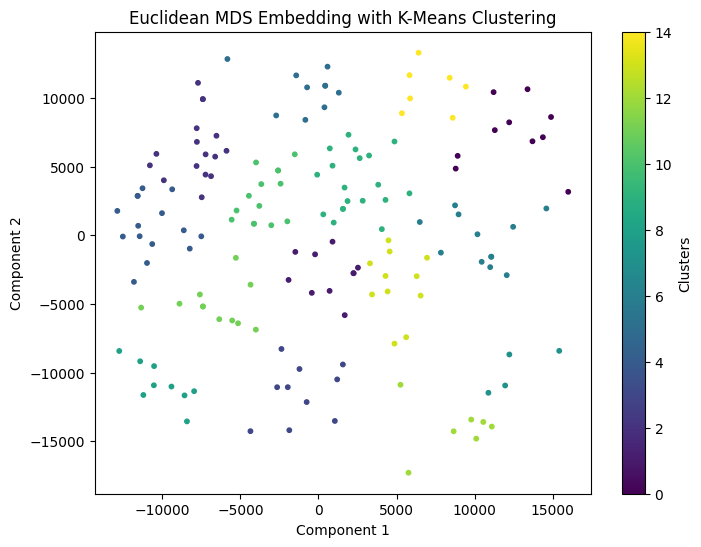

In [ ]:
# Apply K-Means clustering on the embedded data
num_clusters = 15  # Number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(euclidean_embedding)
cluster_labels = kmeans.labels_

# Visualize the clusters in the reduced space
plt.figure(figsize=(8, 6))
plt.scatter(euclidean_embedding[:, 0],euclidean_embedding[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title('Euclidean MDS Embedding with K-Means Clustering')
plt.colorbar(label='Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
cm = confusion_matrix(target_labels, cluster_labels)
cm
row_ind, col_ind = linear_sum_assignment(-cm)
count = cm[row_ind, col_ind].sum()
count

78

In [ ]:
print('NMI of cluster is ', NMI(target_labels, cluster_labels)*100)
print('ACC of cluster is ', count/165*100)
print('Fscore of cluster is ', f1_score(target_labels, cluster_labels, average = 'weighted')*100)
print('ARI of cluster is ', ARI(target_labels, cluster_labels)*100)


NMI of cluster is  56.10797182313141
ACC of cluster is  47.27272727272727
Fscore of cluster is  0.6349206349206349
ARI of cluster is  29.34506004732354


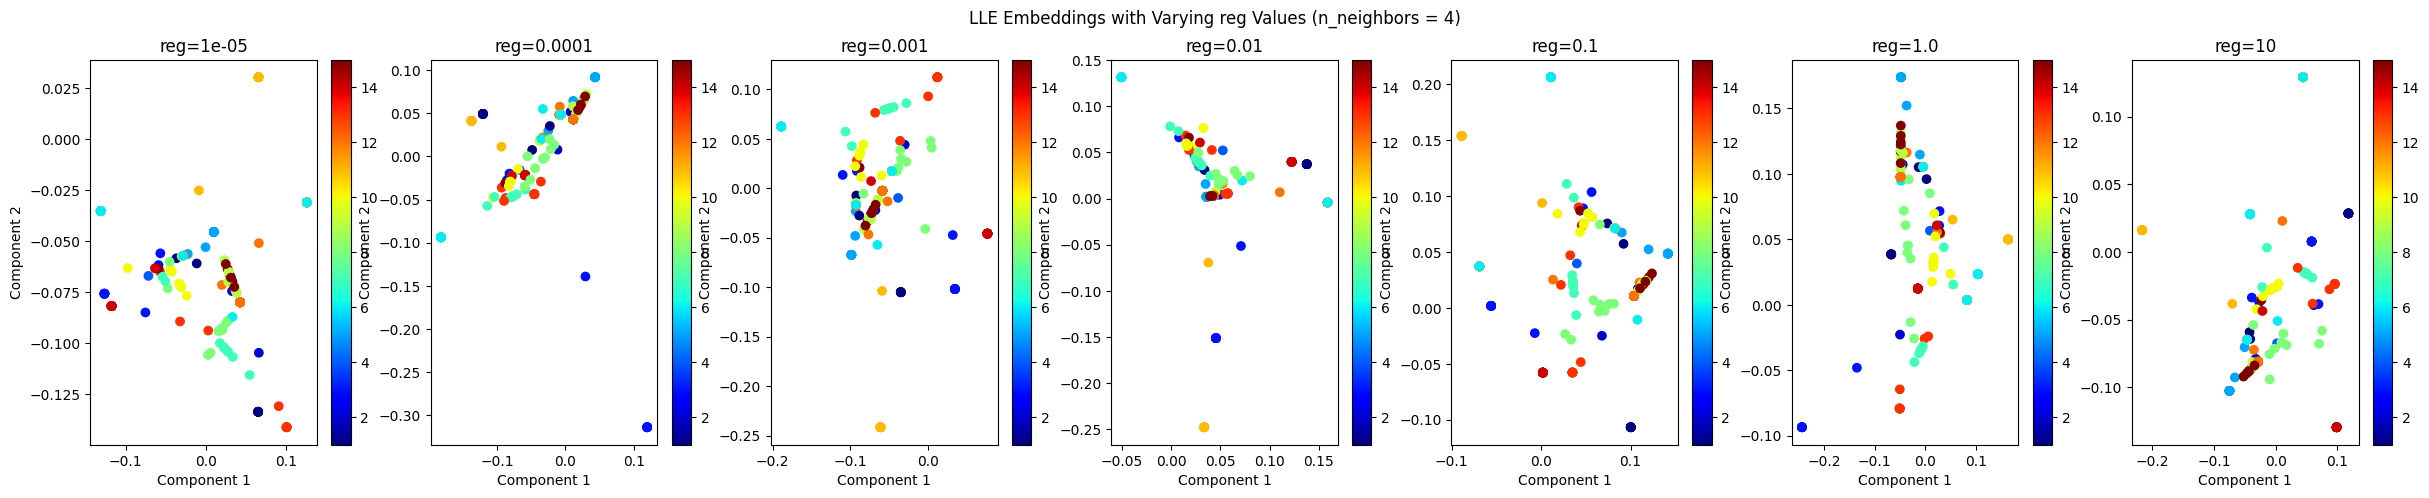

In [ ]:

def plot_lle_embeddings(data, n_components, n_neighbors, reg_values):
    fig, axes = plt.subplots(1, len(reg_values), figsize=(30, 5))
    fig.suptitle('LLE Embeddings with Varying reg Values (n_neighbors = {})'.format(n_neighbors))

    for i, reg in enumerate(reg_values):
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, reg=reg, method='standard')
        embedding = lle.fit_transform(data)
        ax = axes[i]
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, cmap='jet')
        ax.set_title(f'reg={reg}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        fig.colorbar(scatter, ax=ax)

# Parameters for the LLE embeddings
n_components = 2
n_neighbors = 4
reg_values = [0.00001, 0.0001,0.001, 0.01, 0.1, 1.0, 10]

# Create multiple plots with varying reg values
plot_lle_embeddings(data, n_components, n_neighbors, reg_values)
plt.show()

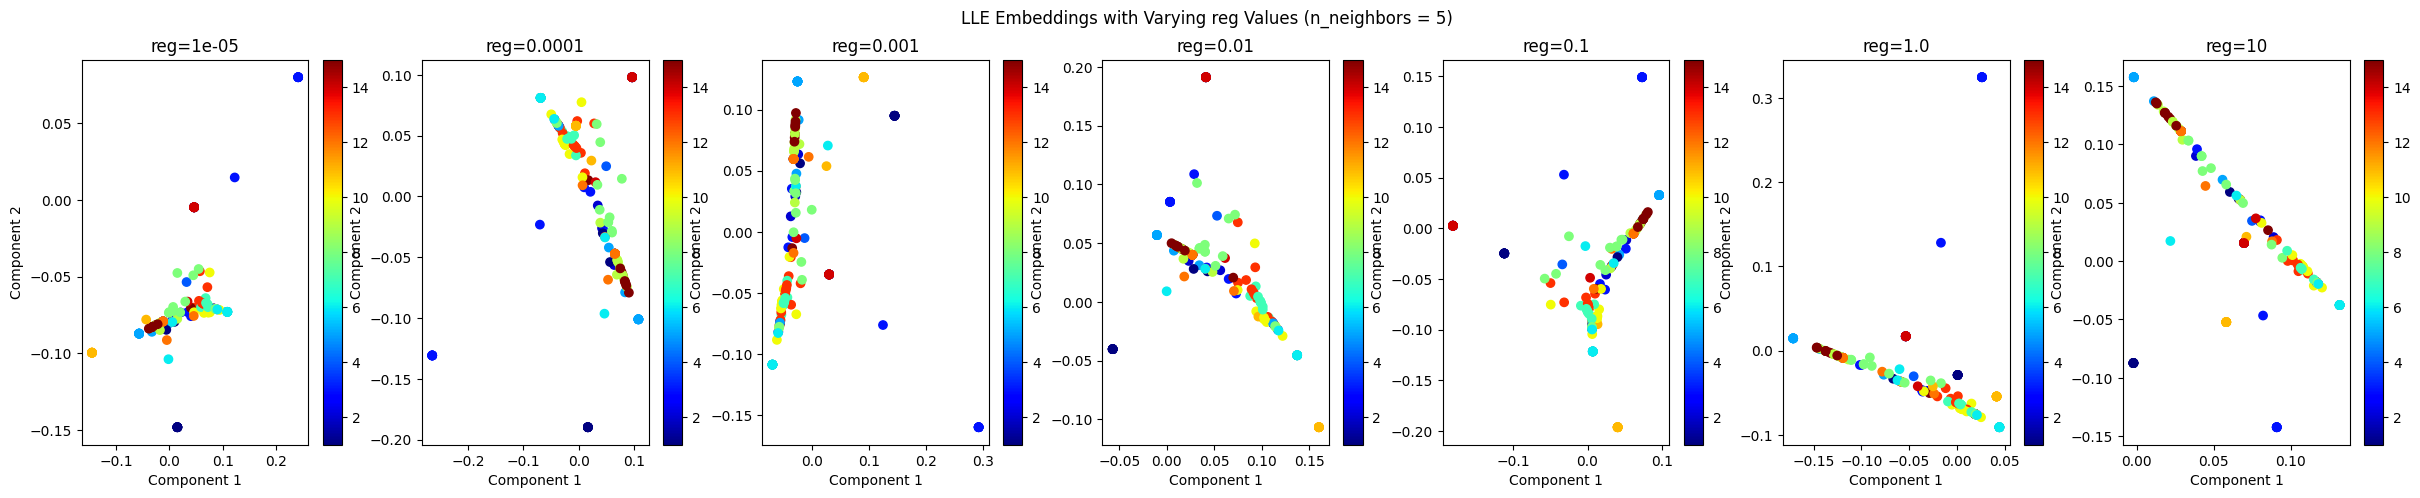

In [ ]:
plot_lle_embeddings(data, n_components, 5, reg_values)
plt.show()

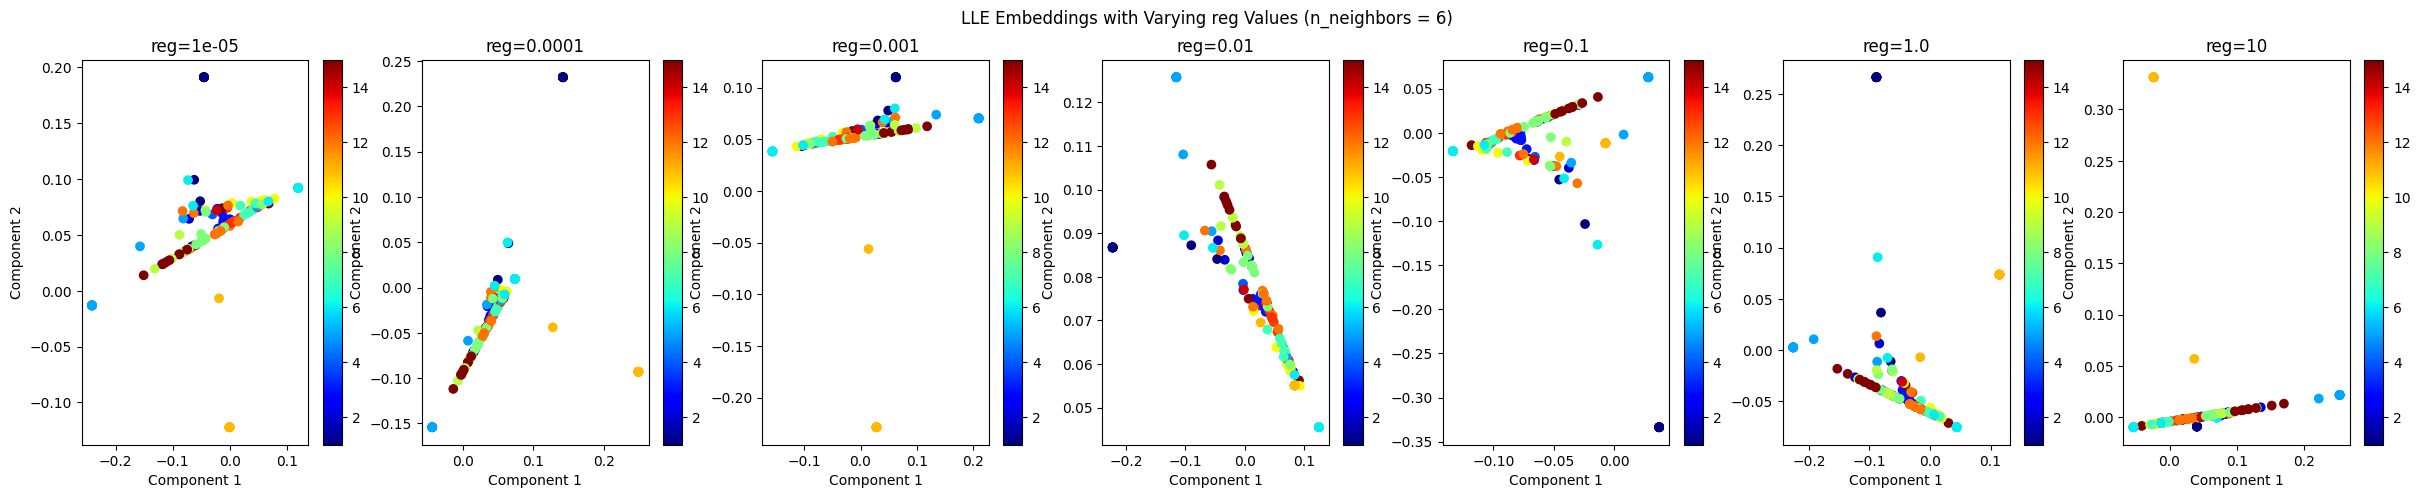

In [ ]:
plot_lle_embeddings(data, n_components, 6, reg_values)
plt.show()

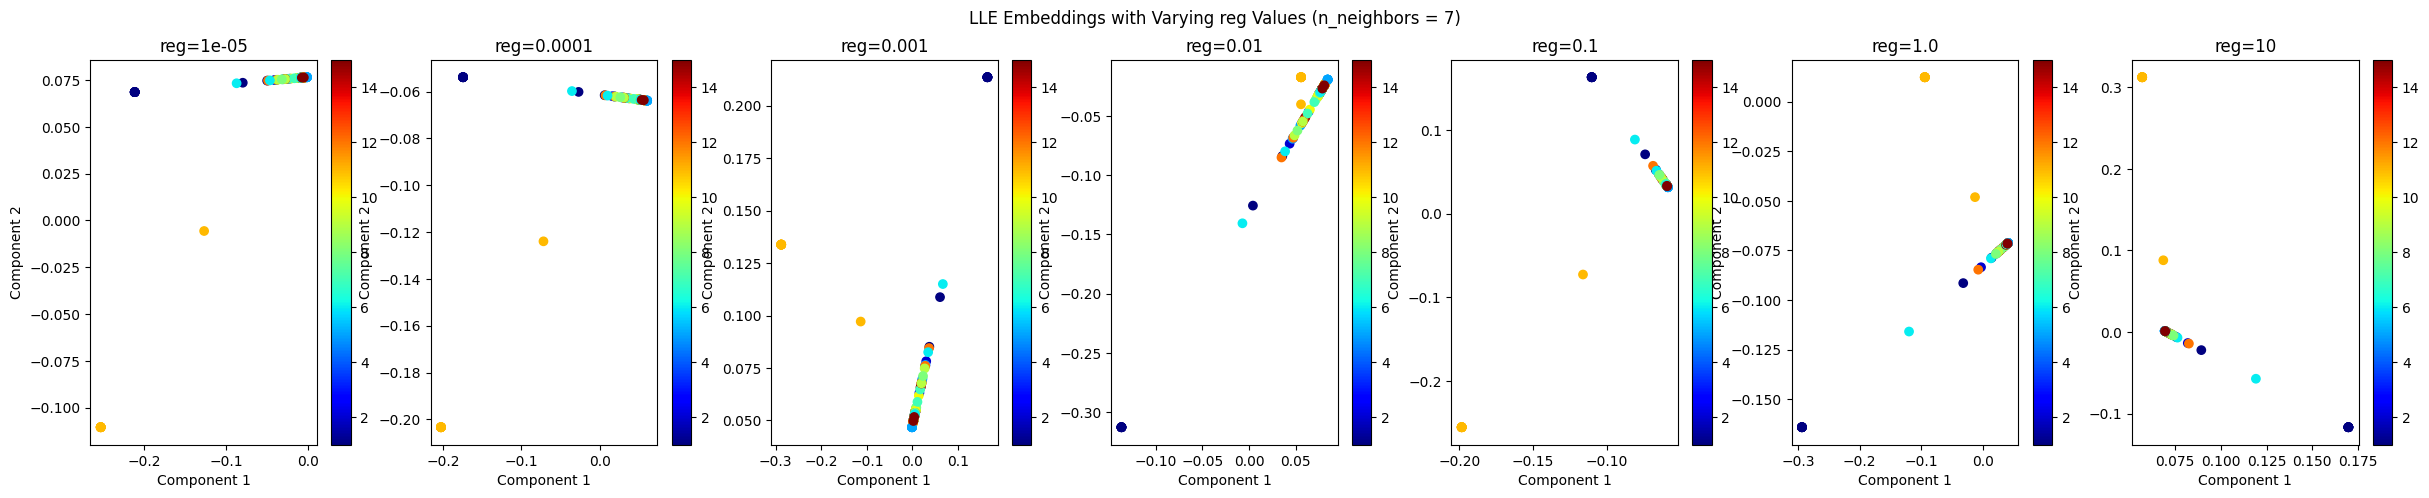

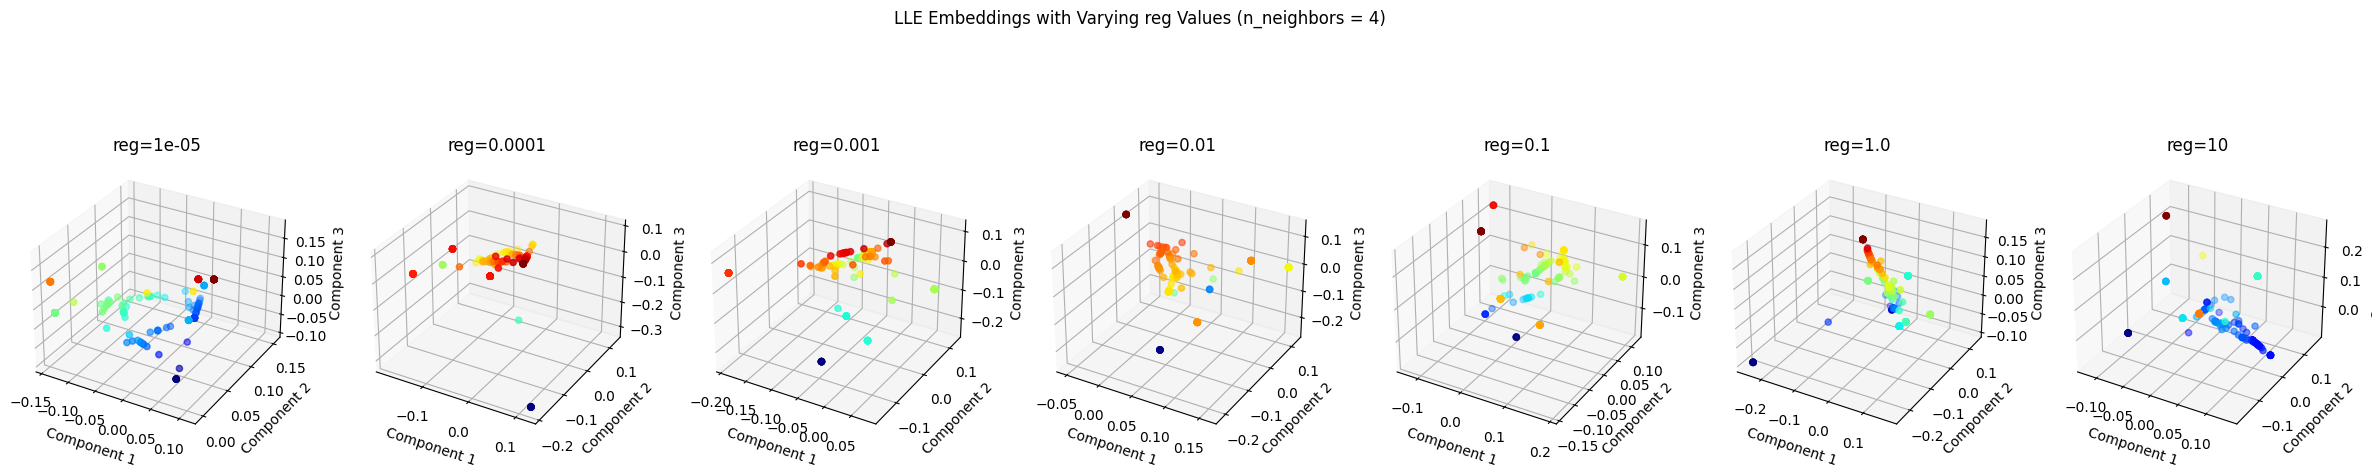

In [ ]:
def plot_lle_embeddings_3d(data, n_components, n_neighbors, reg_values):
    fig = plt.figure(figsize=(30, 6))
    fig.suptitle('LLE Embeddings with Varying reg Values (n_neighbors = {})'.format(n_neighbors))

    for i, reg in enumerate(reg_values):
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, reg=reg, method='standard')
        embedding = lle.fit_transform(data)

        ax = fig.add_subplot(1, len(reg_values), i+1, projection='3d')
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=embedding[:, 2], cmap='jet')
        ax.set_title(f'reg={reg}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')





n_components = 3
n_neighbors = 4  #
reg_values = [0.00001, 0.0001,0.001, 0.01, 0.1, 1.0, 10]

# Create multiple 3D plots with varying reg values
plot_lle_embeddings_3d(data, n_components, n_neighbors, reg_values)
plt.show()

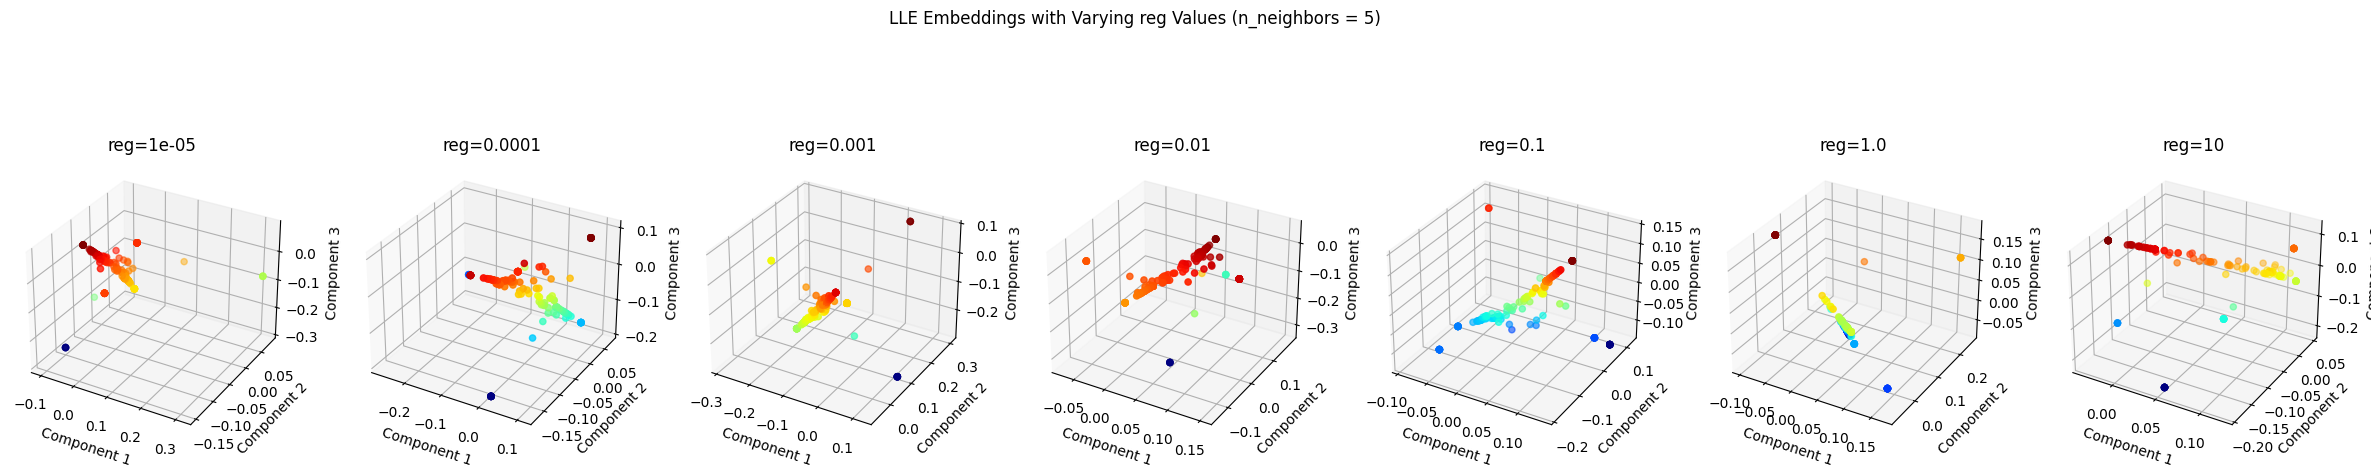

In [ ]:
plot_lle_embeddings_3d(data, n_components, 5, reg_values)
plt.show()

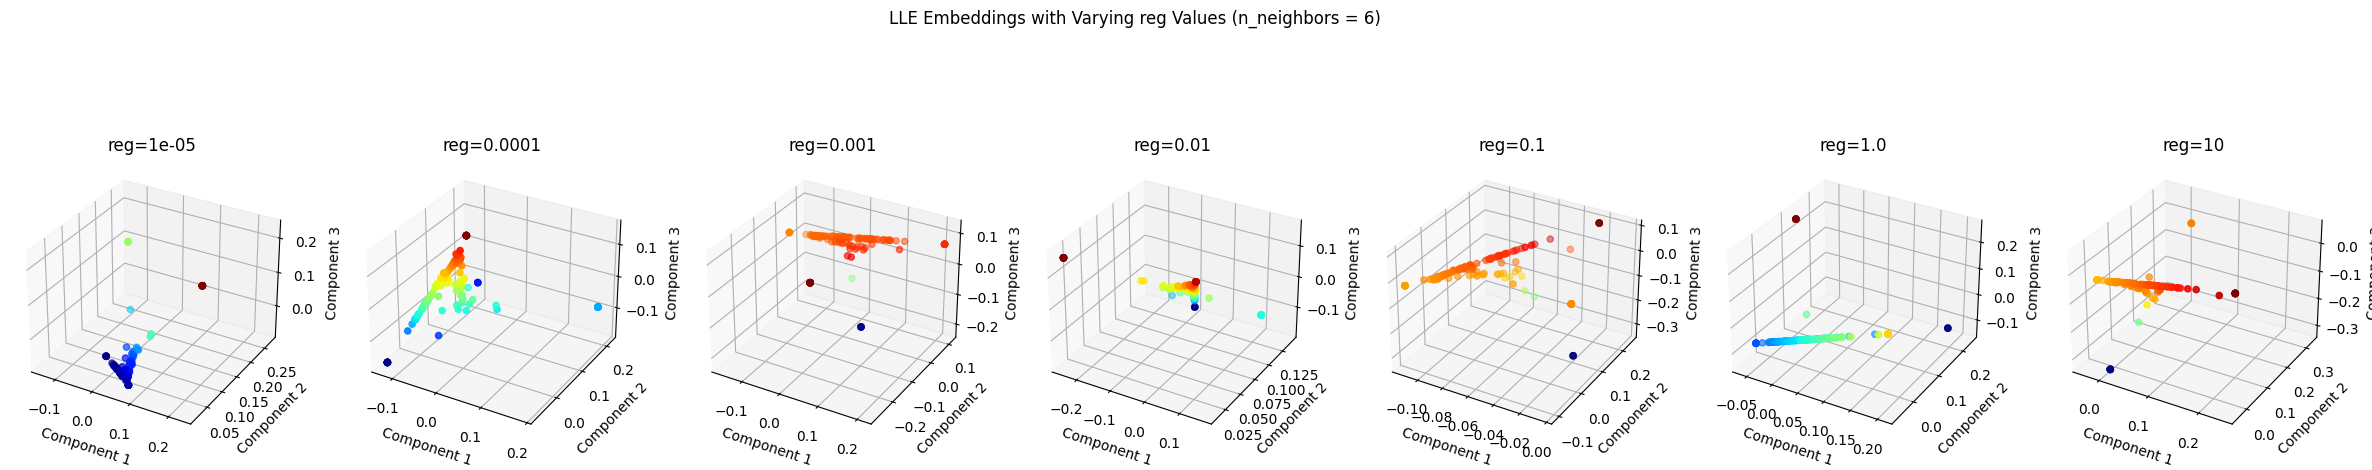

In [ ]:
plot_lle_embeddings_3d(data, n_components, 6, reg_values)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
n_components = 2
perplexity = 20
learning_rate = 10

tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate)
embedding = tsne.fit_transform(data)


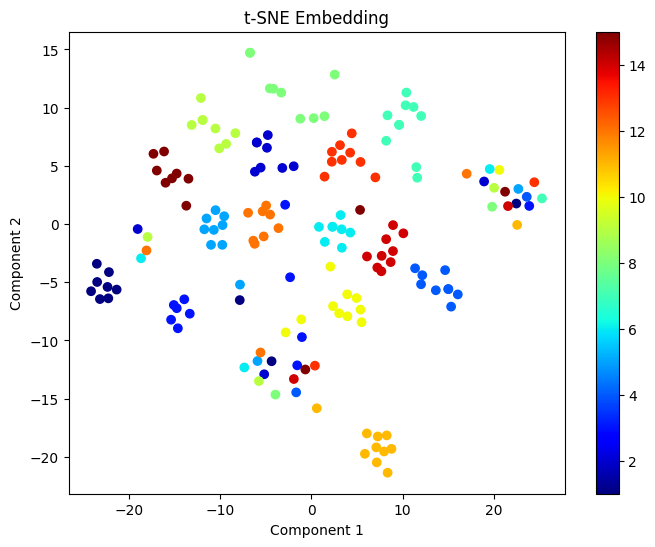

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, cmap='jet')
plt.title('t-SNE Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()


In [ ]:
def plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values):
    fig, axes = plt.subplots(1, len(learning_rate_values), figsize=(30, 5))
    fig.suptitle('t-SNE Embeddings with Varying learning rate and perplexity = {}'.format(perplexity))

    for i, learning_rate in enumerate(learning_rate_values):
        tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate)
        embedding = tsne.fit_transform(data)
        ax = axes[i]
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, cmap='jet')
        ax.set_title(f'reg={learning_rate}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        fig.colorbar(scatter, ax=ax)


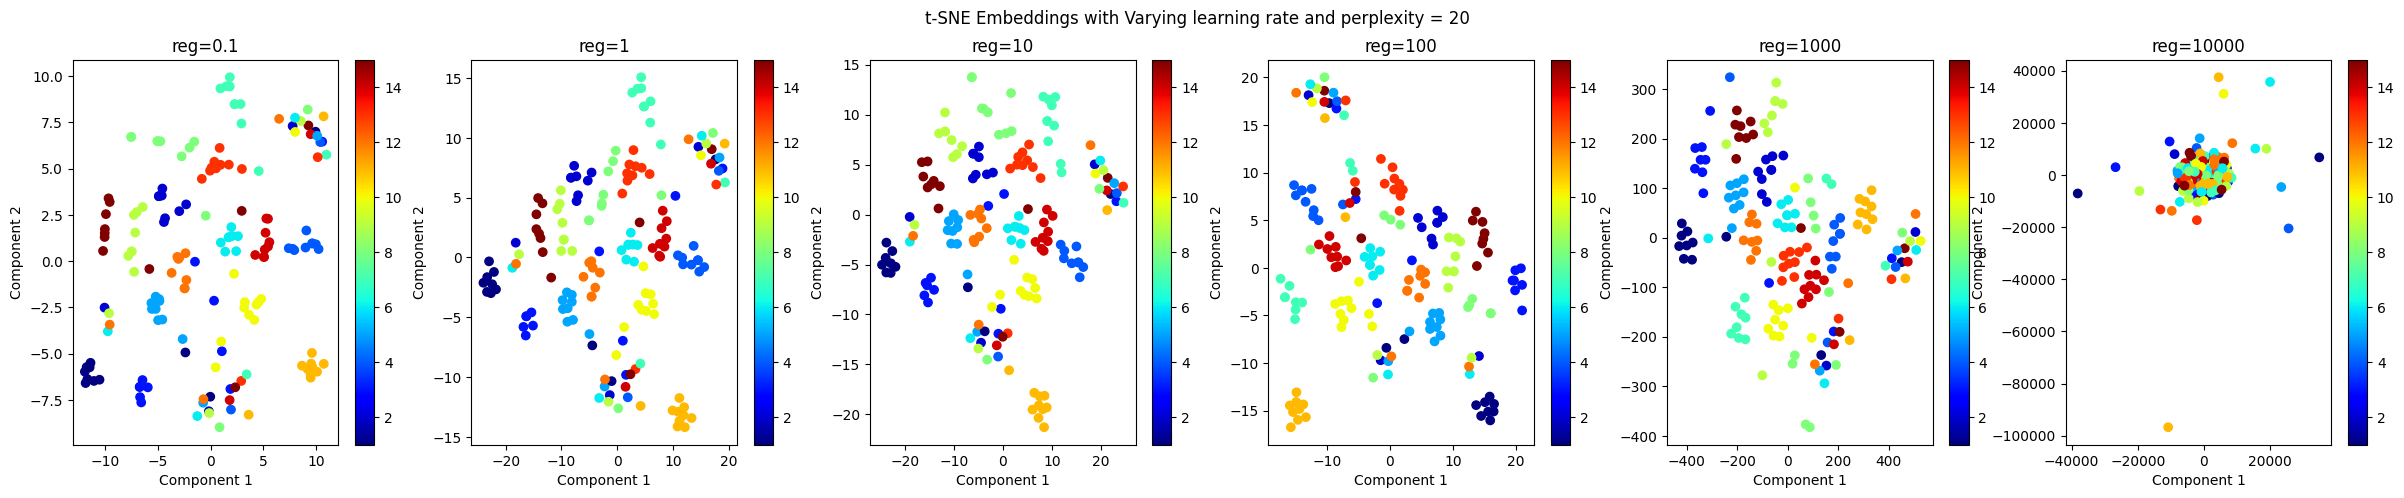

In [ ]:
n_components = 2
perplexity = 20
learning_rate_values = [0.1, 1, 10, 100, 1000, 10000]

plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values)

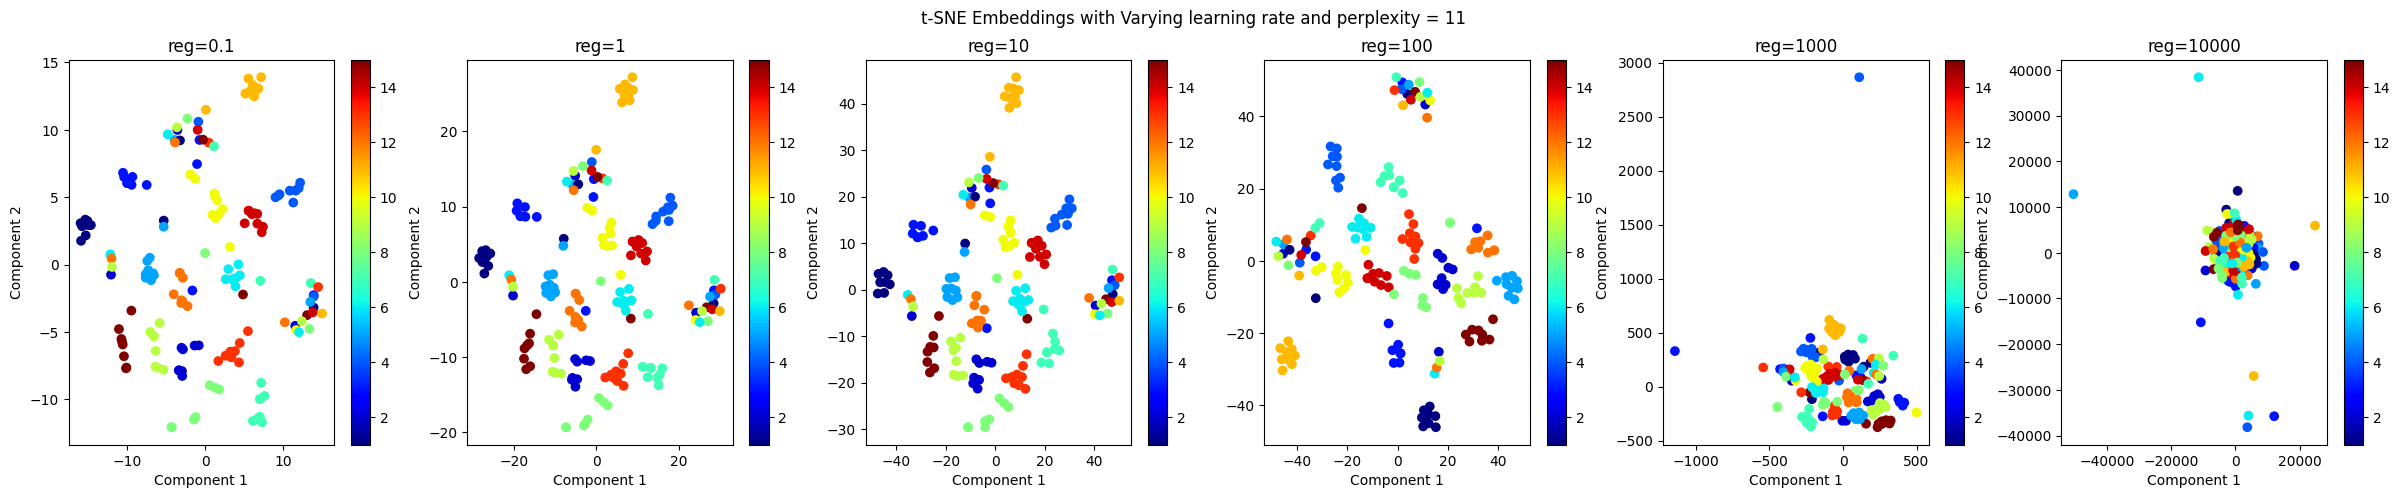

In [ ]:
perplexity = 11
plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values)

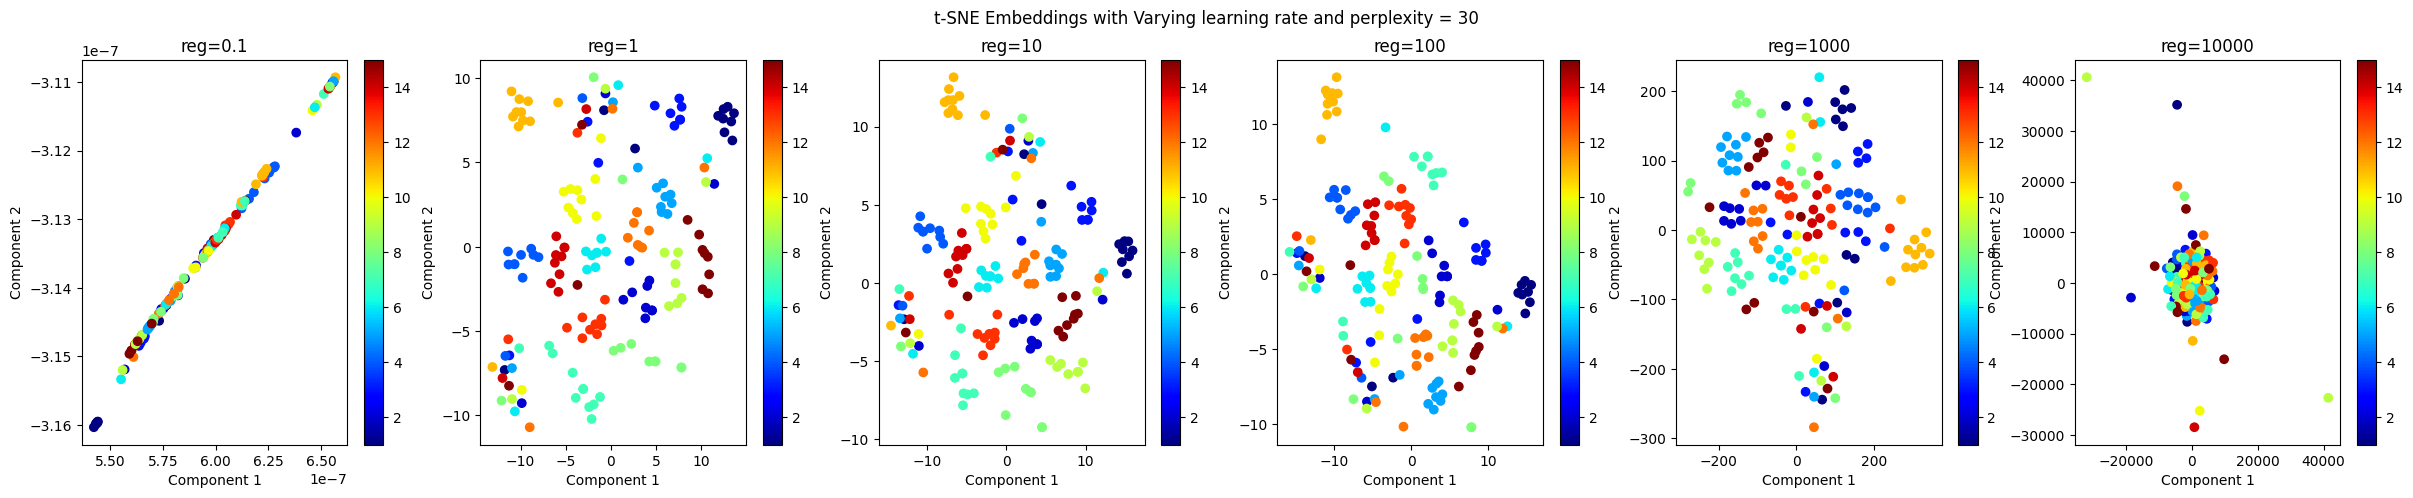

In [ ]:
perplexity = 30
plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values)

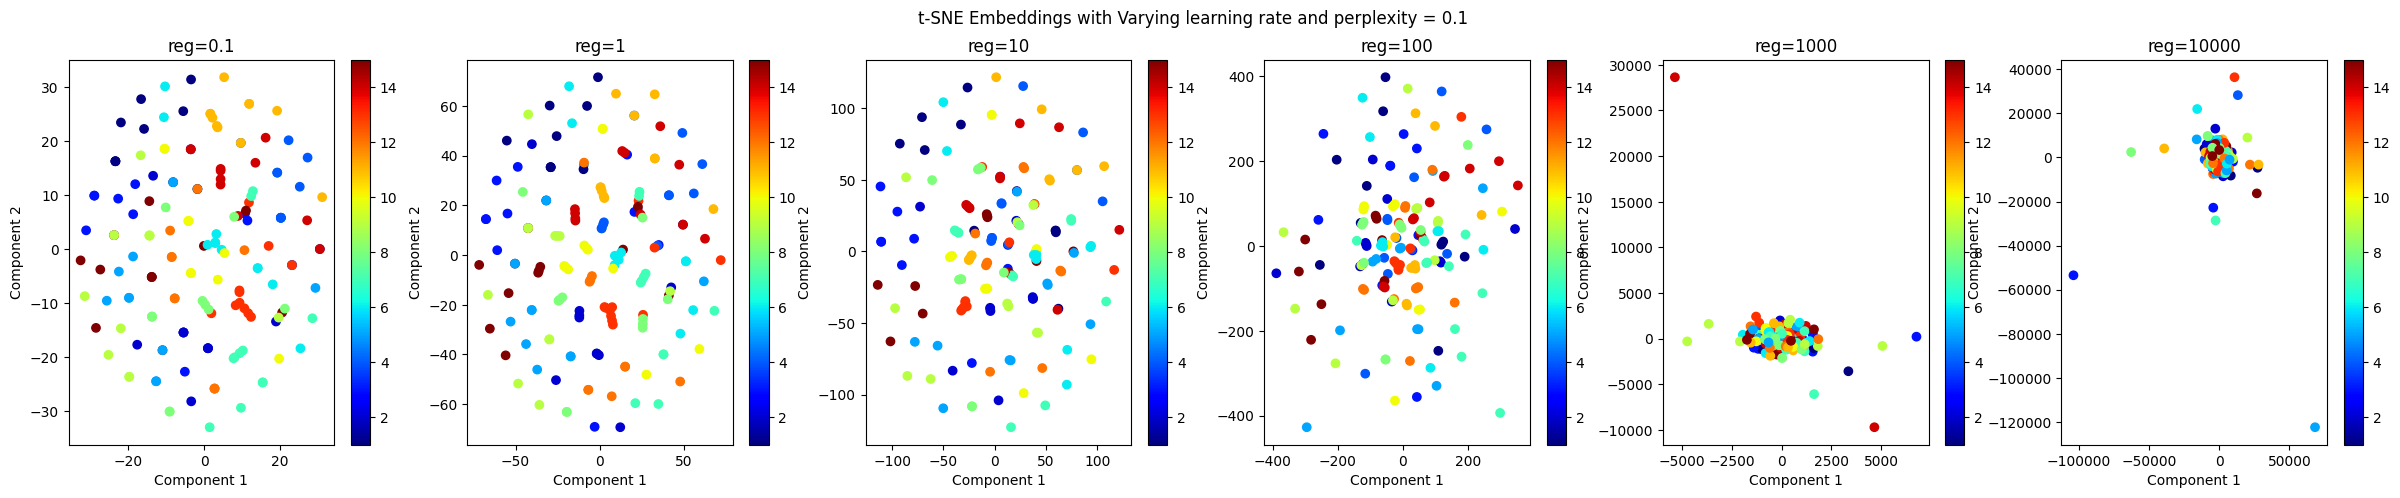

In [ ]:
perplexity = 0.1
plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values)

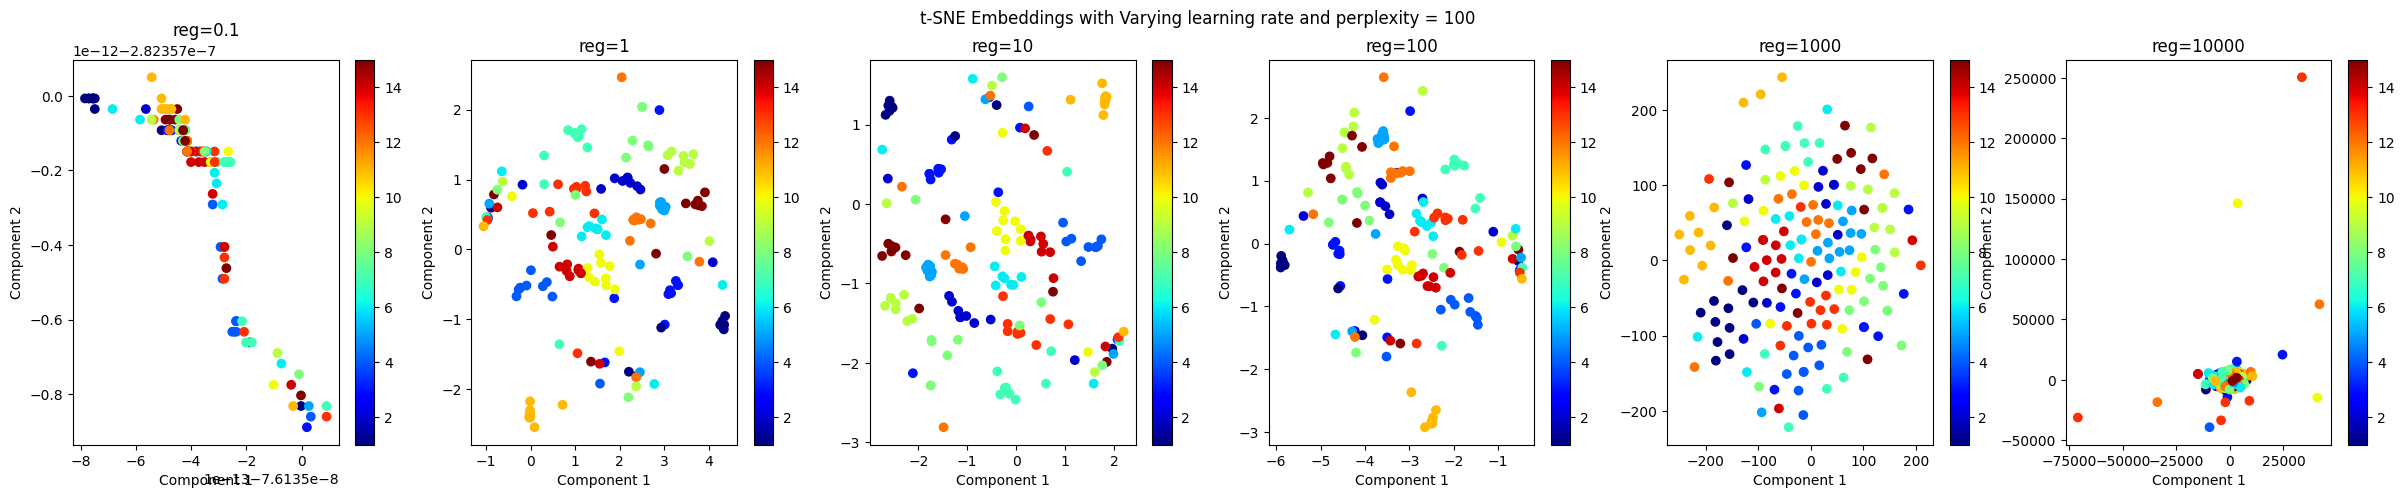

In [ ]:
perplexity = 100
plot_tsne_embeddings(data, n_components, perplexity, learning_rate_values)

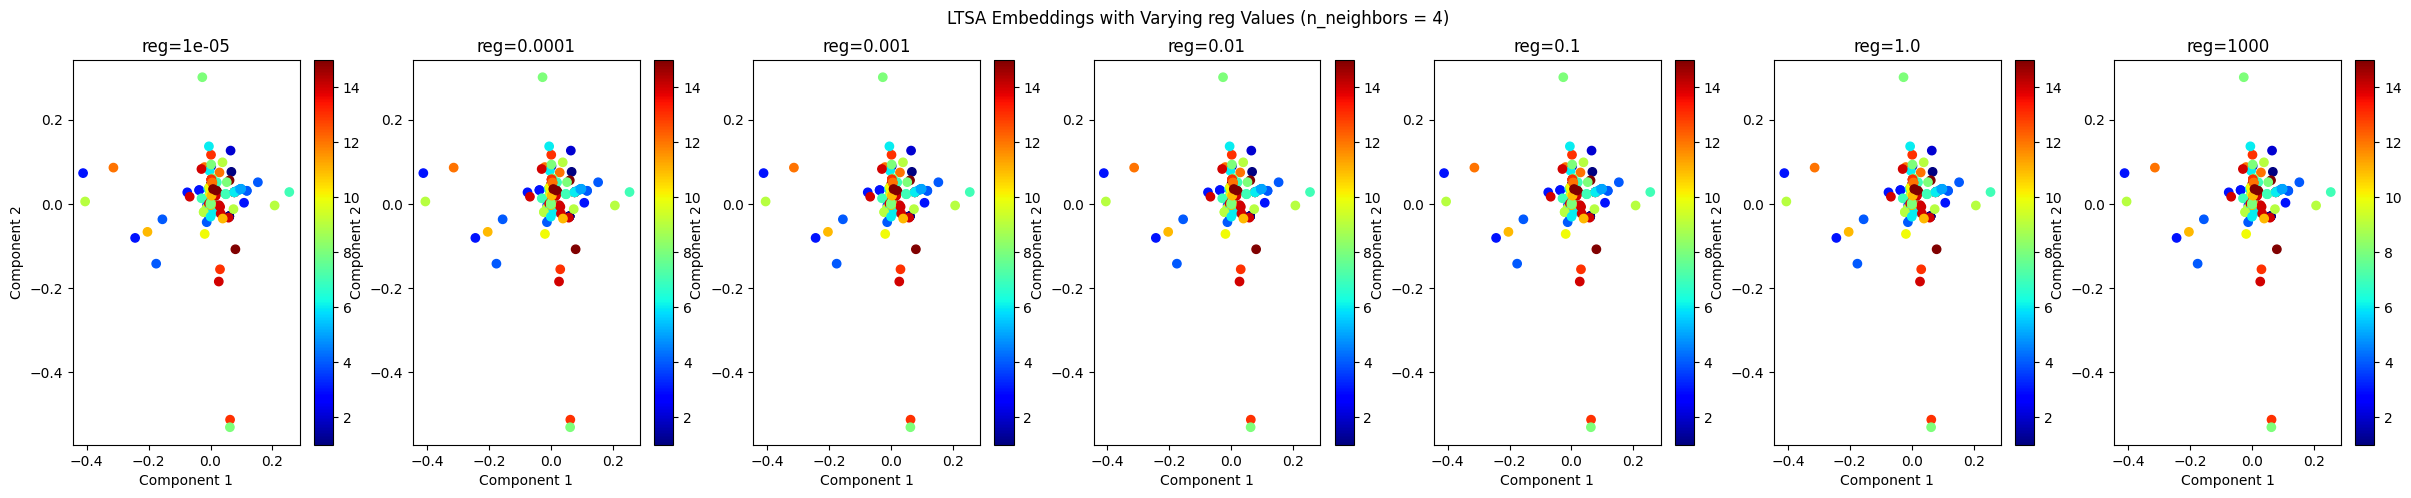

In [ ]:
def plot_lle_embeddings(data, n_components, n_neighbors, reg_values):
    fig, axes = plt.subplots(1, len(reg_values), figsize=(30, 5))
    fig.suptitle('LTSA Embeddings with Varying reg Values (n_neighbors = {})'.format(n_neighbors))

    for i, reg in enumerate(reg_values):
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, tol = 0.1, max_iter=1000, reg=reg, method='ltsa')
        embedding = lle.fit_transform(data)
        ax = axes[i]
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=target_labels, cmap='jet')
        ax.set_title(f'reg={reg}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        fig.colorbar(scatter, ax=ax)



n_components = 2
n_neighbors = 4
reg_values = [0.00001, 0.0001,0.001, 0.01, 0.1, 1.0, 10]

# Create multiple plots with varying reg values
plot_lle_embeddings(data, n_components, n_neighbors, reg_values)
plt.show()

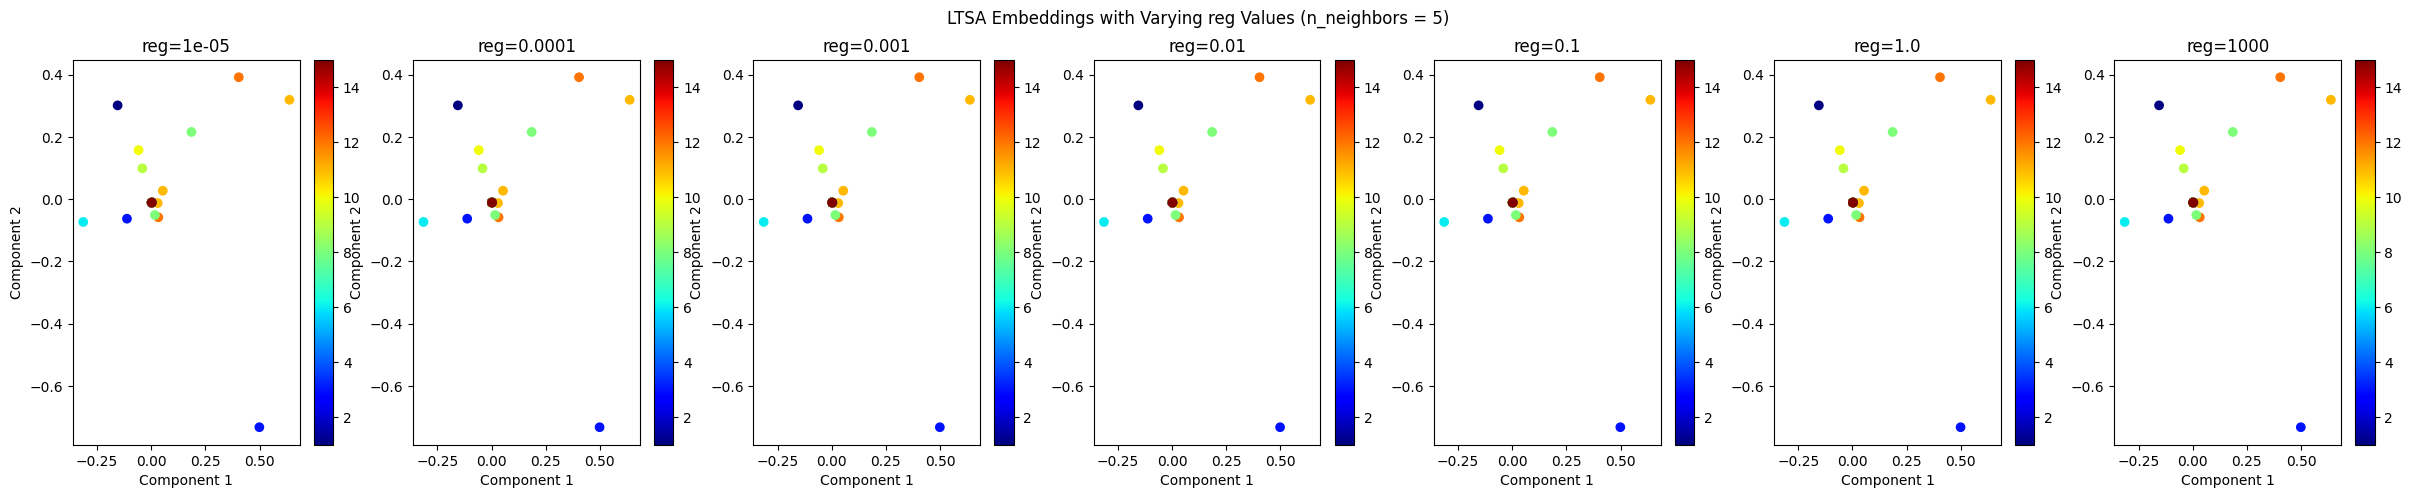

In [ ]:
plot_lle_embeddings(data, n_components, 5, reg_values)
plt.show()

In [ ]:
def plot_ltsa_embeddings_3d(data, n_components, n_neighbors, reg_values):
    fig = plt.figure(figsize=(30, 6))
    fig.suptitle('LTSA Embeddings with Varying reg Values (n_neighbors = {})'.format(n_neighbors))

    for i, reg in enumerate(reg_values):
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, reg=reg, method='ltsa')
        embedding = lle.fit_transform(data)

        ax = fig.add_subplot(1, len(reg_values), i+1, projection='3d')
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=target_labels, cmap='jet')
        ax.set_title(f'reg={reg}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')





n_components = 3
n_neighbors = 4  #
reg_values = [0.000001, 0.0001,0.001, 0.01, 0.1, 1.0, 100000]

# Create multiple 3D plots with varying reg values
plot_ltsa_embeddings_3d(data, n_components, n_neighbors, reg_values)
plt.show()

NameError: ignored

<Figure size 3000x600 with 0 Axes>

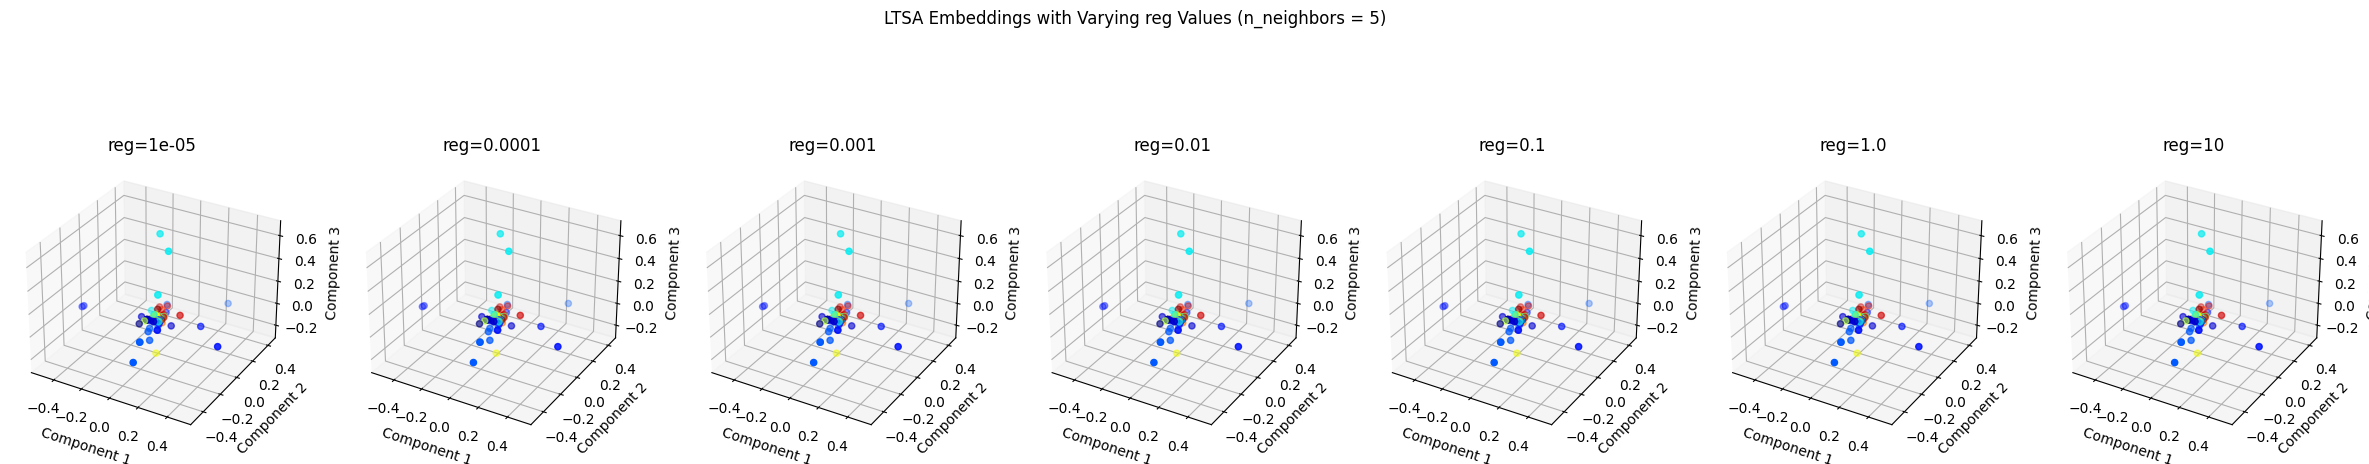

In [ ]:
plot_lle_embeddings_3d(data, n_components, 5, reg_values)
plt.show()

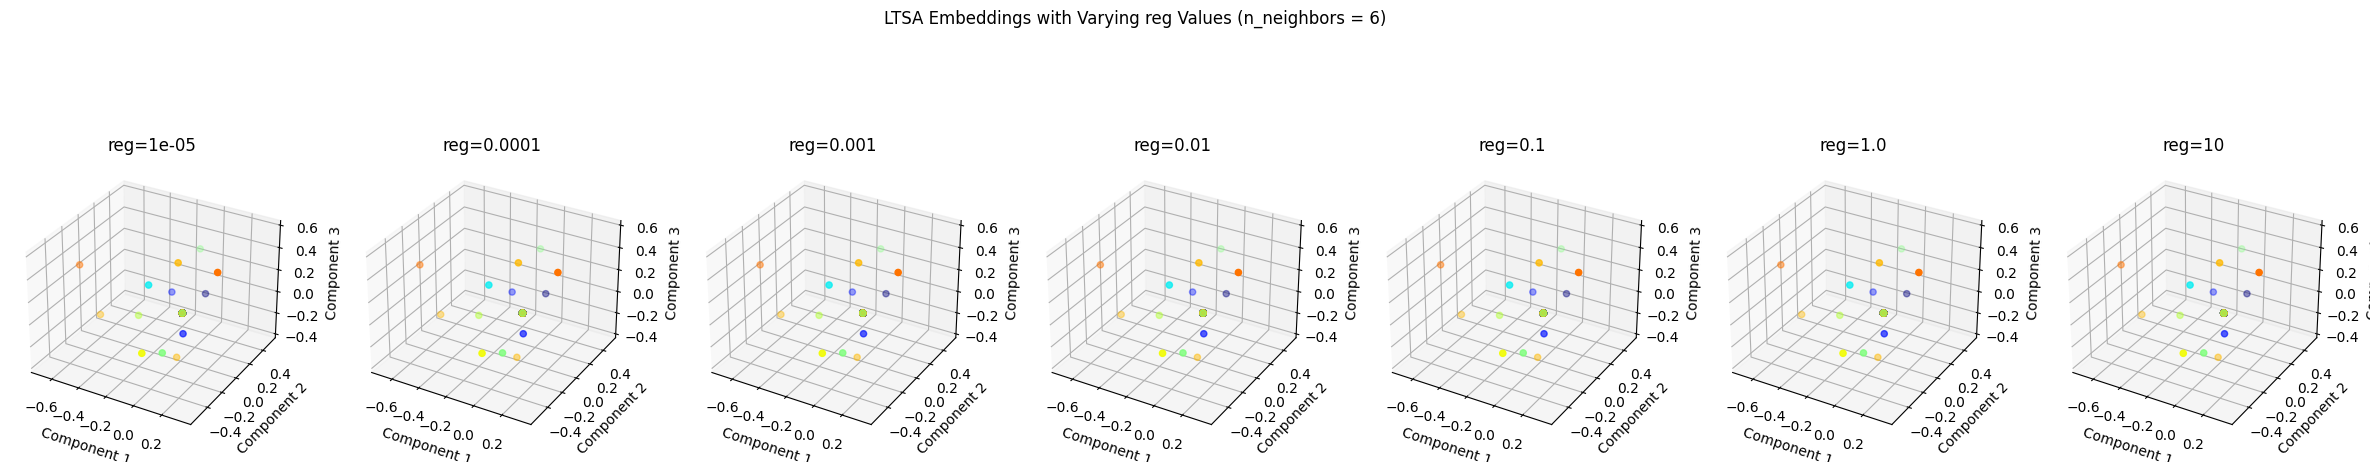

In [ ]:
plot_lle_embeddings_3d(data, n_components, 6, reg_values)
plt.show()

In [ ]:
from pydiffmap import diffusion_map as dm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# initialize Diffusion map object.
neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}

mydmap = dm.DiffusionMap.from_sklearn(n_evecs=2, k=10000, epsilon='bgh', alpha=10, neighbor_params=neighbor_params)
# fit to data and return the diffusion map.
dmap = mydmap.fit_transform(data)

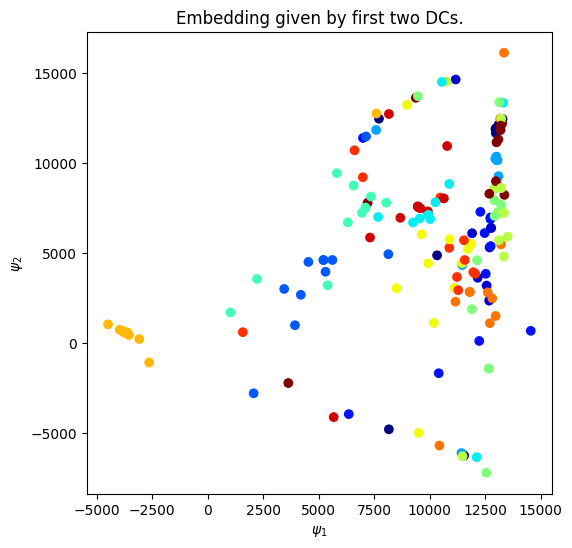

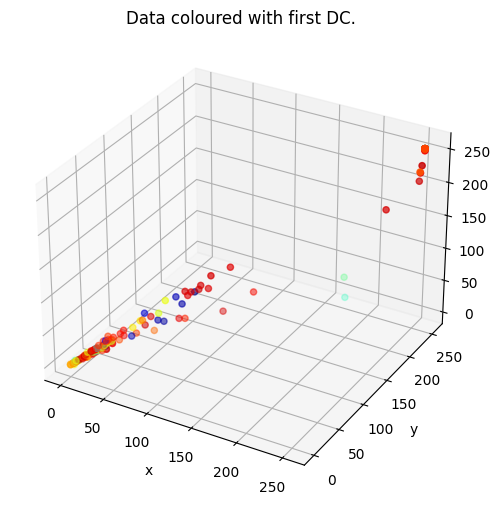

In [ ]:
from pydiffmap.visualization import embedding_plot, data_plot

embedding_plot(mydmap, scatter_kwargs = {'c': target_labels, 'cmap': 'jet'})
data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'jet'})

plt.show()

In [ ]:
# initialize Diffusion map object.
neighbor_params = {'n_jobs': -1, 'algorithm': 'ball_tree'}

mydmap = dm.DiffusionMap.from_sklearn(n_evecs=3, k=10000, epsilon='bgh', alpha=1, neighbor_params=neighbor_params)
# fit to data and return the diffusion map.
dmap = mydmap.fit_transform(data)

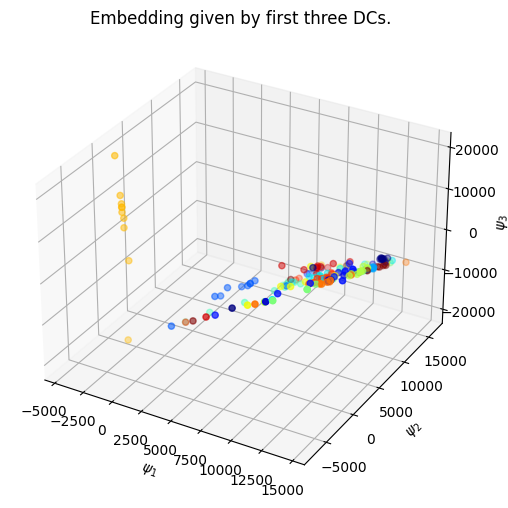

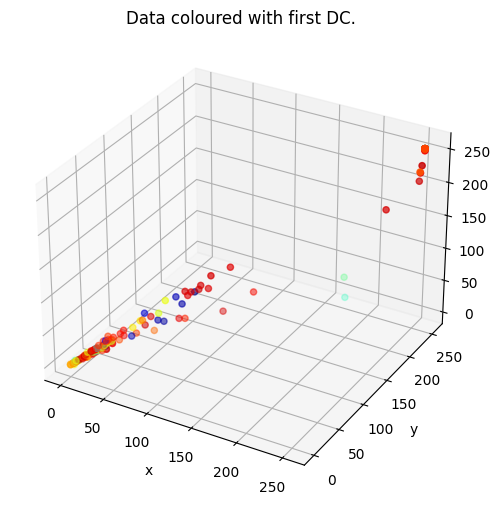

In [ ]:
from pydiffmap.visualization import embedding_plot, data_plot

embedding_plot(mydmap, dim=3, scatter_kwargs = {'c': target_labels, 'cmap': 'jet'})
data_plot(mydmap, dim=3, scatter_kwargs = {'cmap': 'jet'})

plt.show()

In [18]:
# Functions for voxel reps and pointcloud reps
def vox_to_pointcloud(voxarray,grid,eps=0):
    # Convert a voxel representation ('voxarray') to a (weighted) point cloud representation
    # Assume that the input grid is in "ij meshgrid" format i.e. the grid has two layers, xx and yy, each size (nx)-by-(ny)
    # The voxel array will be unrolled via "column-major" order ("Fortran/Matlab" ordering)
    # Note that initially the number of voxels must equal the number of grid points - but
    # zero voxels will be removed from the representation (i.e. no points with weight zero allowed)
    # if the optional parameter eps is passed, voxels with value less or equal to eps will be dropped
    # The returned array consists of (x,y,w) tuples i.e. X = [x1,y1,w1;x2,y2,w2;...;xP,yP,wP] where P
    # is the number of nonzero points
    xx,yy = np.squeeze(np.split(grid,2))
    X = np.vstack((xx.ravel(),yy.ravel())).T
    nX  = X.shape[0] # Number of points = number of rows
    nvi = voxarray.shape[0] # Number of voxel rows
    nvj = voxarray.shape[1] # Number of voxel cols
    if nX != nvi*nvj: raise ValueError("Number of grid points must equal number of voxels!")
    print(X.shape)
    print(voxarray.T.shape)
    X = np.concatenate((X,voxarray.T.reshape(nvi*nvj,1)),axis=1)
    return X[X[:,2]>eps,:]

def pointcloud_to_vox(array,grid):
    # Converts a pointcloud representation to a voxel representation
    # Assumes that the grid is in "ij meshgrid" format i.e. grid has two layers, xx and yy; each are size (nx+1)-by-(ny+1)
    # The grid points are assumed to define the corners of the voxels, so the
    # voxel rep will be a single nx-by-ny array with entries equal to the average pointcloud weights
    # V_ij = \mean_k W_k if (x_k,y_k) is in voxel ij
    xx,yy = np.squeeze(np.split(grid,2))

    points = array[:,0:2]
    values = array[:,2]
#   interp = NearestNDInterpolator(points,values)
    interp = LinearNDInterpolator(points,values,fill_value=0.0)
    X = interp(xx,yy).T
    #interp = RBFInterpolator(points,values,smoothing=0,kernel='linear')
    #X = np.reshape(interp(np.vstack((xx.ravel(),yy.ravel())).T),(xx.shape[0],xx.shape[1]))
    return X

(12, 2)
(3, 4)


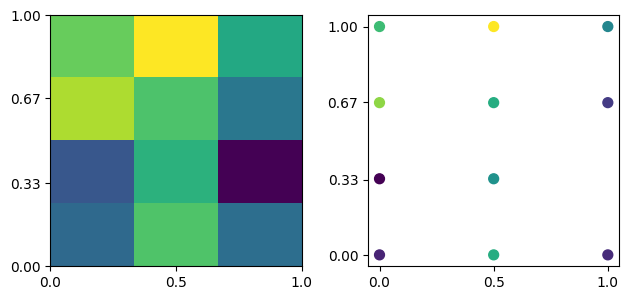

In [ ]:
# Testing voxel-to-pointcloud conversion

# First, create voxel array
numx = 3
numy = 4

voxarray = np.random.rand(numy,numx)  # Note: number of rows = number of y points
# Set one of the elements to zero (to check zero weight handling)
voxarray[1,2] = 0

# Create a pointcloud grid for vox-to-PC conversion
nxg = numx
nyg = numy
x = np.linspace(0,1,nxg)
y = np.linspace(0,1,nyg)
xx,yy = np.meshgrid(x,y,indexing='ij')
grid = np.stack((xx,yy))
# Convert voxel array to pointcloud
X = vox_to_pointcloud(voxarray,grid)
# Plot voxel array and its pointcloud rep
fig1,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(voxarray,origin='lower',extent=(0,1,0,1))
ax1.set_xticks(np.round(x,2))
ax1.set_yticks(np.round(y,2))
ax2.scatter(X[:,0],X[:,1],s=50,c=X[:,2])

ax2.set_aspect(1)
ax2.set_xticks(np.round(x,2))
ax2.set_yticks(np.round(y,2))
fig1.tight_layout()

(0.0, 1.0)

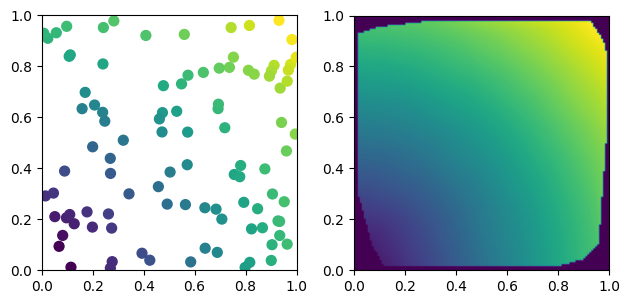

In [ ]:
# Testing pointcloud-to-voxel conversion

# Generate a pointcloud by selecting random points
nPC = 100
points = np.random.rand(nPC,2)
values = np.hypot(points[:,0],points[:,1])
PCarray = np.hstack((points,values[:,np.newaxis]))
# Create a grid for pointcloud-to-voxel conversion
nxg = 129
nyg = 129
x = np.linspace(0,1,nxg)
y = np.linspace(0,1,nyg)
xx,yy = np.meshgrid(x,y,indexing='ij')
grid = np.stack((xx,yy))
Y = pointcloud_to_vox(PCarray,grid)

fig2,(ax3,ax4) = plt.subplots(1,2)
fig2.tight_layout()
ax3.scatter(PCarray[:,0],PCarray[:,1],s=50,c=PCarray[:,2])
ax4.imshow(Y,origin='lower',extent=[0,1,0,1])
ax3.set_aspect(1)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)

In [ ]:
# Testing meshgrid, stack and split ops
nxg = 3
nyg = 4
x = np.linspace(0,1,nxg)
y = np.linspace(0,1,nyg)
xx,yy = np.meshgrid(x,y,indexing='ij')
grid = np.stack((xx,yy))
xx2,yy2 = np.squeeze(np.split(grid,2))
#
display(xx)
display(yy)
display(grid)
display(xx2)
display(yy2)

array([[0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. ]])

array([[0.        , 0.33333333, 0.66666667, 1.        ],
       [0.        , 0.33333333, 0.66666667, 1.        ],
       [0.        , 0.33333333, 0.66666667, 1.        ]])

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.5       , 0.5       , 0.5       , 0.5       ],
        [1.        , 1.        , 1.        , 1.        ]],

       [[0.        , 0.33333333, 0.66666667, 1.        ],
        [0.        , 0.33333333, 0.66666667, 1.        ],
        [0.        , 0.33333333, 0.66666667, 1.        ]]])

array([[0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. ]])

array([[0.        , 0.33333333, 0.66666667, 1.        ],
       [0.        , 0.33333333, 0.66666667, 1.        ],
       [0.        , 0.33333333, 0.66666667, 1.        ]])

In [ ]:
# Testing meshgrid, stack and split ops
nxg = 3
nyg = 4
x = np.linspace(0,1,nxg)
y = np.linspace(0,1,nyg)
xx,yy = np.meshgrid(x,y,indexing='ij')
grid = np.stack((xx,yy))
xx2,yy2 = np.squeeze(np.split(grid,2))
#
display(xx)
display(yy)
display(grid)
display(xx2)
display(yy2)

array([[0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. ]])

array([[0.        , 0.33333333, 0.66666667, 1.        ],
       [0.        , 0.33333333, 0.66666667, 1.        ],
       [0.        , 0.33333333, 0.66666667, 1.        ]])

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.5       , 0.5       , 0.5       , 0.5       ],
        [1.        , 1.        , 1.        , 1.        ]],

       [[0.        , 0.33333333, 0.66666667, 1.        ],
        [0.        , 0.33333333, 0.66666667, 1.        ],
        [0.        , 0.33333333, 0.66666667, 1.        ]]])

array([[0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. ]])

array([[0.        , 0.33333333, 0.66666667, 1.        ],
       [0.        , 0.33333333, 0.66666667, 1.        ],
       [0.        , 0.33333333, 0.66666667, 1.        ]])

grid shape (2, 224, 224)
1/1 [==============================] - 0s 25ms/step


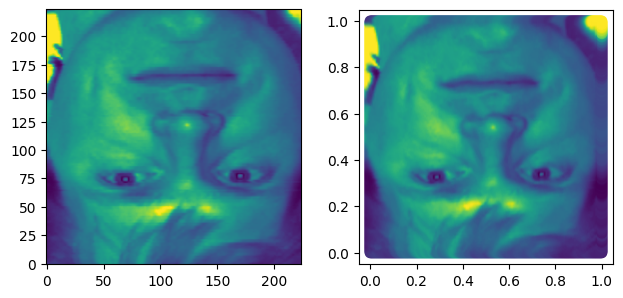

In [ ]:
## Test creating pointclouds from MNIST zeros
nxg = 224
nyg = 224
x = np.linspace(0,1,nxg)
y = np.linspace(0,1,nyg)
xx,yy = np.meshgrid(x,y,indexing='ij')
grid = np.stack((xx,yy))
print("grid shape",grid.shape)
# Convert voxel array to pointcloud
voxarray = extract_face_from_file("/content/drive/MyDrive/Yale Face Dataset/subject01.centerlight")
X = vox_to_pointcloud(voxarray,grid)

# Plot voxel array and its pointcloud rep
fig1,(ax1,ax2) = plt.subplots(1,2)
fig1.tight_layout()
ax1.imshow(voxarray,origin='lower')
ax2.scatter(X[:,0],X[:,1],s=50,c=X[:,2])

ax2.set_aspect(1)
#print(X.shape)
#print(X)

In [ ]:
img = Image.open('/content/drive/MyDrive/Safeimagekit-resized-img.png')
npimg = np.array(img)
print(npimg.shape)

(32, 32, 4)


In [ ]:
data.shape

(165, 64, 64)

In [ ]:

print(extract_face_from_file("/content/drive/MyDrive/Yale Face Dataset/subject01.centerlight").shape)

1/1 [==============================] - 0s 29ms/step
(224, 224)


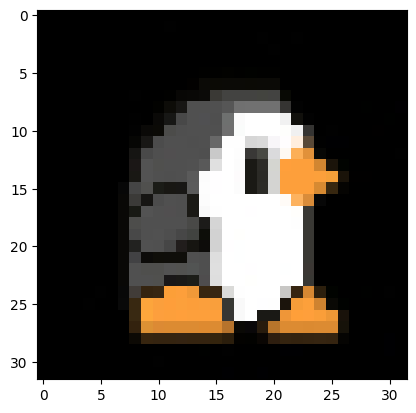

In [ ]:
plt.imshow(npimg)

In [ ]:
gray_image = img.convert('L')

In [ ]:
npimg = np.array(gray_image)
npimg.shape

(32, 32)

grid shape (2, 32, 32)
(1024, 2)
(32, 32)


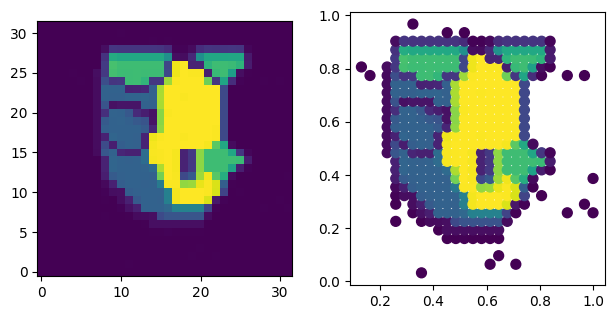

In [ ]:
## Test creating pointclouds for image
nxg = 32
nyg = 32
x = np.linspace(0,1,nxg)
y = np.linspace(0,1,nyg)
xx,yy = np.meshgrid(x,y,indexing='ij')
grid = np.stack((xx,yy))
print("grid shape",grid.shape)
# Convert voxel array to pointcloud
voxarray = npimg
X = vox_to_pointcloud(voxarray,grid)

# Plot voxel array and its pointcloud rep
fig1,(ax1,ax2) = plt.subplots(1,2)
fig1.tight_layout()
ax1.imshow(voxarray,origin='lower')
ax2.scatter(X[:,0],X[:,1],s=50,c=X[:,2])

ax2.set_aspect(1)
#print(X.shape)
#print(X)

In [19]:
def uniform_Wass_squared(U, V,Itermax=100000):
    # Assumes that U and V are pointclouds i.e. U = [x1,y1,w1;...;xp,yp,wp] etc
    Upts = np.ascontiguousarray(U[:,0:2])
    Vpts = np.ascontiguousarray(V[:,0:2])
    Uwts = np.ascontiguousarray(U[:,2])
    Vwts = np.ascontiguousarray(V[:,2])
    Uwts = Uwts/np.sum(Uwts)
    Vwts = Vwts/np.sum(Vwts)
    M = ot.dist(Upts, Vpts)  # Compute euclidean distance on the pointcloud points
    W = ot.emd2(Uwts,Vwts, M,numItermax=Itermax)
    return W

def uniform_wass_squared_sinkhorn(U, V, p=2, reg = 1):
    # Assumes that U and V are pointclouds i.e. U = [x1,y1,w1;...;xp,yp,wp] etc
    Upts = np.ascontiguousarray(U[:,0:2])
    Vpts = np.ascontiguousarray(V[:,0:2])
    Uwts = np.ascontiguousarray(U[:,2])
    Vwts = np.ascontiguousarray(V[:,2])
    Uwts = Uwts/np.sum(Uwts)
    Vwts = Vwts/np.sum(Vwts)
    M = np.power(ot.dist(Upts, Vpts,'euclidean'),p)  # Compute euclidean distance on the pointcloud points
    #W = ot.emd2(Uwts,Vwts, M,numItermax=Itermax) # Compute exact W_2 distances
    ## ot.emd2 is the exact linear program function to compute W_2 distances exactly. This is slow.
    ## The user can substitute other W_2 distance approximations such as ot.sinkhorn or many others
    ## Example in the following lines
    #reg = 0.5
    W = ot.sinkhorn2(Uwts,Vwts, M, reg)
    return W

def Wasserstein_Matrix(image_list,squared=True):
    """
    The function compute the (squared if squared=True) Wasserstein Distance Matrix between N images
    image_list: python list of pointcloud representations
    """
    N = len(image_list) #number of images
    distance = np.zeros((N,N)) #initialize the distance matrix

    #cost = ot.dist(supp, supp) #should be a MXM array
    for i in range(N):
        for j in range(i+1,N):
            if squared==True:
                distance[i,j] = uniform_Wass_squared(image_list[i], image_list[j])
            else:
                distance[i,j] = uniform_Wass_squared(image_list[i], image_list[j])**.5
    distance += distance.T
    return distance

def Euclidean_Matrix(image_tensor,squared=True):
    """
    The function compute the (squared if squared=True) Euclidean Distance Matrix between N 2D images
    image_tensor: Should be a Mx2xN array, where M is the number of pixels.
    """
    N = image_tensor.shape[-1] #number of rows
    distance = np.zeros((N,N)) #initialize the distance matrix
    for i in range(N):
        for j in range(i+1,N):
            if squared==True:
                distance[i,j] = la.norm(image_tensor[:,:,i]-image_tensor[:,:,j])**2
            else:
                distance[i,j] = la.norm(image_tensor[:,:,i]-image_tensor[:,:,j])
    distance += distance.T
    return distance

def Geodesic_Matrix(image_tensor,eps,squared=True):
    """
    Computes the Geodesic distance matrix for a set of N images
    image_tensor is Mx2xN
    """
    Euc_distance = Euclidean_Matrix(image_tensor,squared=False)
    Adj_matrix = np.copy(Euc_distance)
    Adj_matrix[Adj_matrix<eps] = 0
    Euc_distance[Euc_distance<eps] = np.Inf
    G = nx.from_numpy_array(Adj_matrix)
    geo_matrix = shortest_path(Euc_distance, directed=False, return_predecessors=False)
    if(squared==True):
        geo_matrix = np.square(geo_matrix)
    return geo_matrix,G

def MDS(distance_matrix, num_components=2, squared=False):
    """
    Computes non-metric (classical) Multidimensional Scaling (MDS)
    Input should be an NxN distance matrix
    The Boolean squared indicates if the distance matrix passed to the function has already
    been squared entrywise (True) or not (False)
    """
    N = distance_matrix.shape[0]
    H = np.eye(N)-1/N*np.ones((N,N))
    if squared==False:
        B = -.5*H@(distance_matrix**2)@H
    else:
        B = -.5*H@distance_matrix@H
    U,S,VT = la.svd(B)
    embedding = U[:,:num_components]@np.diag(S[:num_components]**.5)
    return embedding

In [20]:
def uniform_wass_squared_sinkhorn(U, V, p=2, reg = 1):
    # Assumes that U and V are pointclouds i.e. U = [x1,y1,w1;...;xp,yp,wp] etc
    Upts = np.ascontiguousarray(U[:,0:2])
    Vpts = np.ascontiguousarray(V[:,0:2])
    Uwts = np.ascontiguousarray(U[:,2])
    Vwts = np.ascontiguousarray(V[:,2])
    Uwts = Uwts/np.sum(Uwts)
    Vwts = Vwts/np.sum(Vwts)
    M = np.power(ot.dist(Upts, Vpts,'euclidean'),p)  # Compute euclidean distance on the pointcloud points
    #W = ot.emd2(Uwts,Vwts, M,numItermax=Itermax) # Compute exact W_2 distances
    ## ot.emd2 is the exact linear program function to compute W_2 distances exactly. This is slow.
    ## The user can substitute other W_2 distance approximations such as ot.sinkhorn or many others
    ## Example in the following lines
    #reg = 0.5
    W = ot.sinkhorn2(Uwts,Vwts, M, reg)
    return W

In [21]:
def wass_matrix(image_list,squared=True,p=2.0,geodesic=False,eps=0,plot=False,returngraph=False,geomethod='eps',k=3,wassmethod='emd2',sinkhornreg=1):
    """
    The function compute the (squared if squared=True) Wasserstein Distance Matrix between N images
    image_list: python list of pointcloud representations
    """
    N = len(image_list) #number of images
    wass_dist = np.zeros((N,N)) #initialize the distance matrix
    for i in range(N):
        for j in range(i+1,N):
            if wassmethod=='emd2':
                wass_dist[i,j] = uniform_wass_squared(image_list[i], image_list[j],p=p)**(1.0/p)
            elif wassmethod=='sinkhorn':
                wass_dist[i,j] = uniform_wass_squared_sinkhorn(image_list[i], image_list[j],p=p,reg = sinkhornreg)**(1.0/p)
    wass_dist += wass_dist.T

In [57]:
nxg = 64
nyg = 64
x = np.linspace(0, 1, nxg)
y = np.linspace(0, 1, nyg)
xx, yy = np.meshgrid(x, y, indexing='ij')
grid = np.stack((xx,yy), axis=-1)

In [58]:
zeros_pointcloud = []
for i in range(data.shape[0]):
    zeros_pointcloud.append(vox_to_pointcloud(data[i], grid))

(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(64, 64)
(4096, 2)
(6

In [ ]:
# Compute Wasserstein square distance matrix
random_zeros = np.random.choice(range(len(zeros_pointcloud)),size=50,replace=False)
tic = time.perf_counter()
# Note the index trick for constructing the list of randomized zeros
Wass_distance = wass_matrix([zeros_pointcloud[i] for i in random_zeros], squared=True, wassmethod='sinkhorn')
toc = time.perf_counter() - tic

AttributeError: ignored

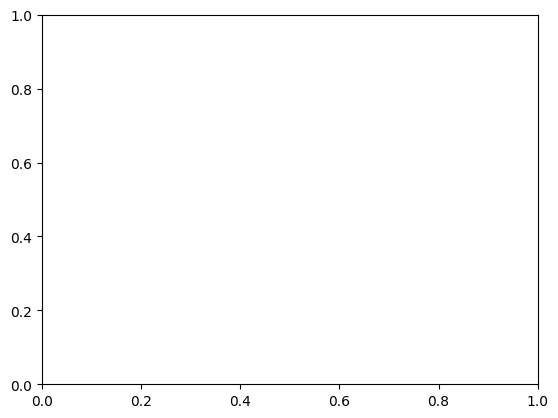

In [37]:
# Compute Wasserstein square distance matrix
random_zeros = np.random.choice(range(len(zeros_pointcloud)),size=50,replace=False)
tic = time.perf_counter()
# Note the index trick for constructing the list of randomized zeros
Wass_distance = wass_matrix([zeros_pointcloud[i] for i in random_zeros], squared=True, wassmethod='sinkhorn')
toc = time.perf_counter() - tic
#print("Computed Wasserstein distance matrix (N = %i) in %0.4f seconds"%(num_samp,toc))
fig,ax = plt.subplots()
Wass_distance = Wass_distance.astype(float)
ax.imshow(Wass_distance)
plt.show()

# Compute and display Wassmap embedding
#WassEmbedding = man.MDS(n_components=2,metric=True,dissimilarity='precomputed',eps=1e-4).fit_transform(Wass_distance)
WassEmbedding = MDS(Wass_distance,squared=True)
fig, ax = plt.subplots()
ax.scatter(WassEmbedding[:,0],WassEmbedding[:,1], c=target_labels, cmap='jet')
ax.set_title("Wassmap Embedding")
plt.show()

array([[0.00000000e+00, 2.63044343e-03, 8.12044645e-04, 4.95287936e-03,
        2.83695209e-03, 3.10137909e-03, 6.38837680e-04, 1.44250100e-03,
        1.60931169e-03, 2.74849336e-03, 1.15936098e-03, 3.52222434e-03,
        3.76752577e-04, 7.48023964e-04, 7.84563482e-03, 1.85384999e-03,
        1.11441581e-03, 9.81997141e-03, 8.54952508e-05, 4.98713245e-04,
        3.79969598e-04, 2.13007945e-03, 6.37453392e-04, 7.94230191e-04,
        7.05170433e-04, 4.35364173e-03, 1.06671980e-02, 6.46252727e-03,
        7.00471836e-03, 7.98269833e-03],
       [2.63044343e-03, 0.00000000e+00, 6.18037716e-04, 4.53140453e-03,
        2.64421515e-03, 2.62586555e-03, 8.86474706e-04, 1.03855317e-03,
        1.47160989e-03, 2.44430958e-03, 1.09469438e-03, 3.27567141e-03,
        6.04158161e-04, 6.01243722e-04, 7.13598274e-03, 1.70659205e-03,
        1.09129254e-03, 1.01467863e-02, 2.84356312e-04, 7.51918025e-04,
        6.09250769e-04, 1.81716541e-03, 8.98431508e-04, 9.78686476e-04,
        4.17921362e-04,

In [61]:
selected_labels = target_labels[random_zeros]

146    15
121    15
0       2
34      1
82     13
12      4
48     12
5       3
140     8
112    14
157     7
129    14
61      9
130     6
86      9
57      6
50      7
104    14
74     15
18      2
101     8
108    14
20      5
66      7
100    10
60     10
131    11
147    11
155     8
160     6
Name: subject, dtype: int64

/usr/local/lib/python3.10/dist-packages/ot/lp/__init__.py:571: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  check_result(result_code)


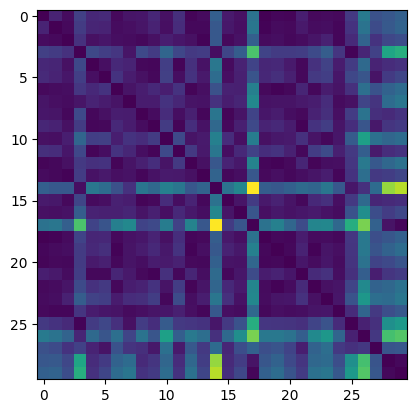

ValueError: ignored

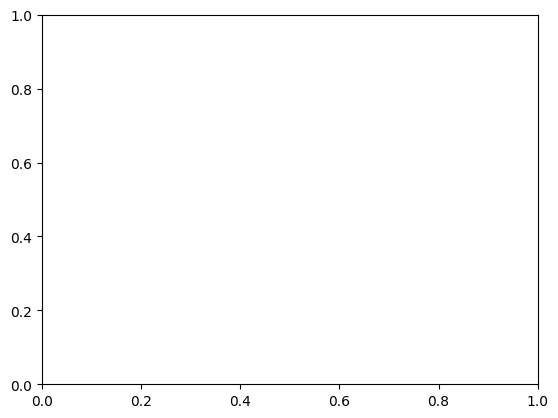

In [59]:
## MNIST test :: Compute Wasserstein square distance matrix
random_zeros = np.random.choice(range(len(zeros_pointcloud)),size=30,replace=False)

tic = time.perf_counter()
# Note the index trick for constructing the list of randomized zeros
Wass_distance = Wasserstein_Matrix([zeros_pointcloud[i] for i in random_zeros],squared=True)
toc = time.perf_counter() - tic
#print("Computed Wasserstein distance matrix (N = %i) in %0.4f seconds"%(num_samp,toc))
fig,ax = plt.subplots()
ax.imshow(Wass_distance)
plt.show()

# Compute and display Wassmap embedding
#WassEmbedding = man.MDS(n_components=2,metric=True,dissimilarity='precomputed',eps=1e-4).fit_transform(Wass_distance)
WassEmbedding = MDS(Wass_distance,squared=True)
fig, ax = plt.subplots()
ax.scatter(WassEmbedding[:,0],WassEmbedding[:,1], c=target_labels, cmap='jet')
ax.set_title("Wassmap Embedding")
plt.show()

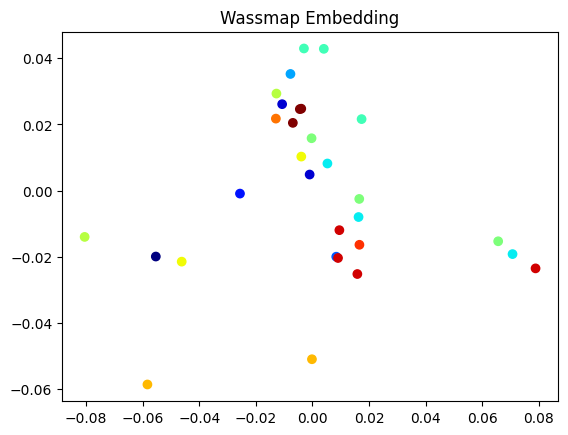

In [63]:

# Compute and display Wassmap embedding
#WassEmbedding = man.MDS(n_components=2,metric=True,dissimilarity='precomputed',eps=1e-4).fit_transform(Wass_distance)
WassEmbedding = MDS(Wass_distance,squared=True)
fig, ax = plt.subplots()
ax.scatter(WassEmbedding[:,0],WassEmbedding[:,1], c=selected_labels, cmap='jet')
ax.set_title("Wassmap Embedding")
plt.show()